# Import required libraries

In [51]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords

# For visualizations (EDA)
import seaborn as sb
sb.set(font_scale=2) # set the default Seaborn style for graphics
import matplotlib.pyplot as plt # we only need pyplot
from collections import Counter
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer

# Correlation analysis
from dython.nominal import associations

# Import cleaned dataset

In [52]:
# Load data back for EDA
news_data = pd.read_csv("cleaned_news_data.csv")
news_data.set_index("id", inplace=True)

In [53]:
news_data.shape

(20584, 29)

In [54]:
# View data
news_data.head()

title              author  \
id                                                                          
0   hous dem aid even see comey letter jason chaff...       Darrell Lucus   
1     flynn hillari clinton big woman campu breitbart     Daniel J. Flynn   
2                                truth might get fire  Consortiumnews.com   
3            civilian kill singl us airstrik identifi     Jessica Purkiss   
4   iranian woman jail fiction unpublish stori wom...      Howard Portnoy   

                                                 text  label label_translated  \
id                                                                              
0   hous dem aid even see comey letter jason chaff...      1             fake   
1   ever get feel life circl roundabout rather hea...      0         not fake   
2   truth might get fire octob tension intellig an...      1             fake   
3   video civilian kill singl us airstrik identifi...      1             fake   
4   print iranian woman sentenc six year prison ir...      1             fake   

    title_charcount  text_charcount  title_wordcount  text_wordcount  \
id                                                                     
0                81            4930               14             820   
1                55            4160                9             710   
2                33            7692                7            1266   
3                63            3237               10             557   
4                93             938               14             154   

    stopwords_count_text  ...  title_pos_noun title_pos_num  title_pos_pron  \
id                        ...                                                 
0                    406  ...               6             0               0   
1                    330  ...               5             0               0   
2                    575  ...               2             0               0   
3                    244  ...               2             0               1   
4                     64  ...               7             0               0   

   title_pos_verb  text_pos_adj text_pos_adv text_pos_noun  text_pos_num  \
id                                                                         
0               1           102           16           234             3   
1               1            81           13           208             3   
2               2           155           33           385             4   
3               1            74            5           158             6   
4               1            13            5            54             2   

    text_pos_pron  text_pos_verb  
id                                
0               0             68  
1               3             45  
2               3             92  
3              12             44  
4               0             11  

[5 rows x 29 columns]

# Exploratory data analysis (EDA)

In [55]:
# Download stopwords data
nltk.download('stopwords')

# Assign to variable
my_stopwords = stopwords.words('english')

# Add some additional stopwords
my_stopwords.extend(["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", 
                     "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", 
                     "but", "by", "can't", "cannot", "could", "couldn't", "did", "didn't", "do", "does", "doesn't", 
                     "doing", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn't", "has", 
                     "hasn't", "have", "haven't", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", 
                     "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", 
                     "is", "isn't", "it", "it's", "its", "itself", "let's", "me", "more", "most", "mustn't", "my", "myself", 
                     "no", "nor", "not", "of", "off", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", 
                     "out", "over", "own", "same", "shan't", "she", "she'd", "she'll", "she's", "should", "shouldn't", "so", "some", 
                     "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", 
                     "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", 
                     "very", "was", "wasn't", "we", "we'd", "we'll", "we're", "we've", "were", "weren't", "what", "what's", "when", "when's", 
                     "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "won't", "would", "wouldn't", 
                     "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves"
                    ])
# Set to remove duplicates and re-assign to variable
# Print to see total list of stopwords
print(my_stopwords:=set(my_stopwords))

{'this', 'was', 'most', 'which', 'myself', 'wouldn', 'both', 'all', "didn't", "isn't", 'above', 'be', 'over', 'such', "weren't", 'only', 'each', 'off', 's', 'and', 'not', 'do', 'i', 'can', 'during', 'in', "i'm", 'so', 'ours', 'am', 'into', 't', 'own', "let's", 'should', 'could', "he's", 'just', 'him', 'to', 'about', 'isn', 'couldn', 're', 'until', 'shouldn', 'shan', 'then', "that's", 'being', 'her', 'out', "she's", 'than', 'did', 'with', "hasn't", "wouldn't", 'where', 'mightn', 'o', "what's", 'has', 'been', 'have', 'we', 'didn', 'what', "doesn't", 'weren', 'our', 'my', 'y', 'hadn', 'themselves', 'your', 'as', 'his', 'the', 'again', 'any', "you're", 'yourself', 'itself', 'same', 'cannot', 'further', 'wasn', "how's", "she'd", "i've", 'won', 'does', 'them', 'if', 'a', "haven't", "needn't", 'theirs', 'while', "wasn't", 'you', 'down', 'few', 'on', 'now', 'at', 'they', 'doing', 'below', "shouldn't", 'their', 'ourselves', 'how', 'more', 'would', 'yours', 'of', 'because', 'up', 'why', 'needn',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aozy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Visualize the fake news to real news ratio

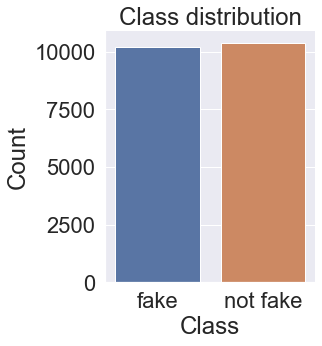

In [56]:
# Class analysis
sb.catplot(x="label_translated", data=news_data, kind = "count").set(
    title="Class distribution", 
    xlabel='Class', 
    ylabel='Count')

## Visualize distribution of wordcount

### Title wordcount

[Text(0.5, 1.0, 'Title wordcount violinplot'), Text(0.5, 0, 'Wordcount')]

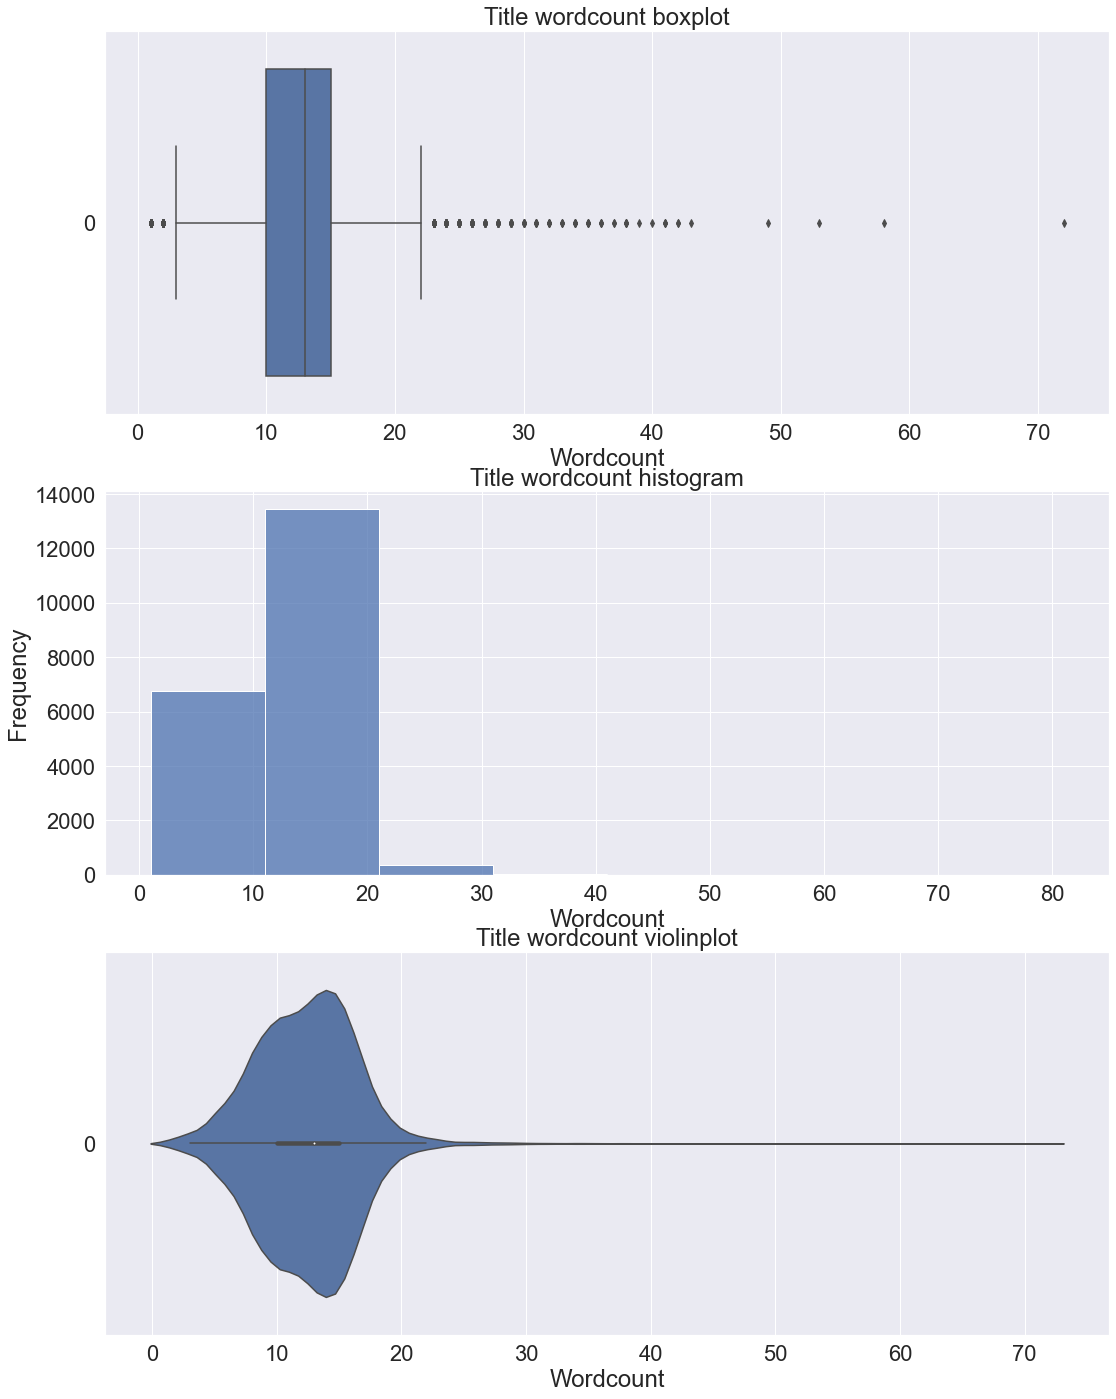

In [57]:
# Word count analysis (Title)
f, axes = plt.subplots(3, 1, figsize=(18, 24))

# Plot distribution graphs (Boxplot & histogram & violinplot)
sb.boxplot(data=news_data["title_wordcount"], orient = "h", ax=axes[0]).set(
    title="Title wordcount boxplot", 
    xlabel='Wordcount')
sb.histplot(data=news_data["title_wordcount"], binwidth=10, ax=axes[1]).set(
    title="Title wordcount histogram", 
    xlabel='Wordcount',
    ylabel='Frequency')
sb.violinplot(data=news_data["title_wordcount"], orient = "h", ax = axes[2]).set(
    title="Title wordcount violinplot", 
    xlabel='Wordcount')

In [58]:
# View stats
news_data['title_wordcount'].describe()

count    20584.000000
mean        12.348620
std          4.102417
min          1.000000
25%         10.000000
50%         13.000000
75%         15.000000
max         72.000000
Name: title_wordcount, dtype: float64

### Text wordcount

[Text(0.5, 1.0, 'Title wordcount violinplot'), Text(0.5, 0, 'Wordcount')]

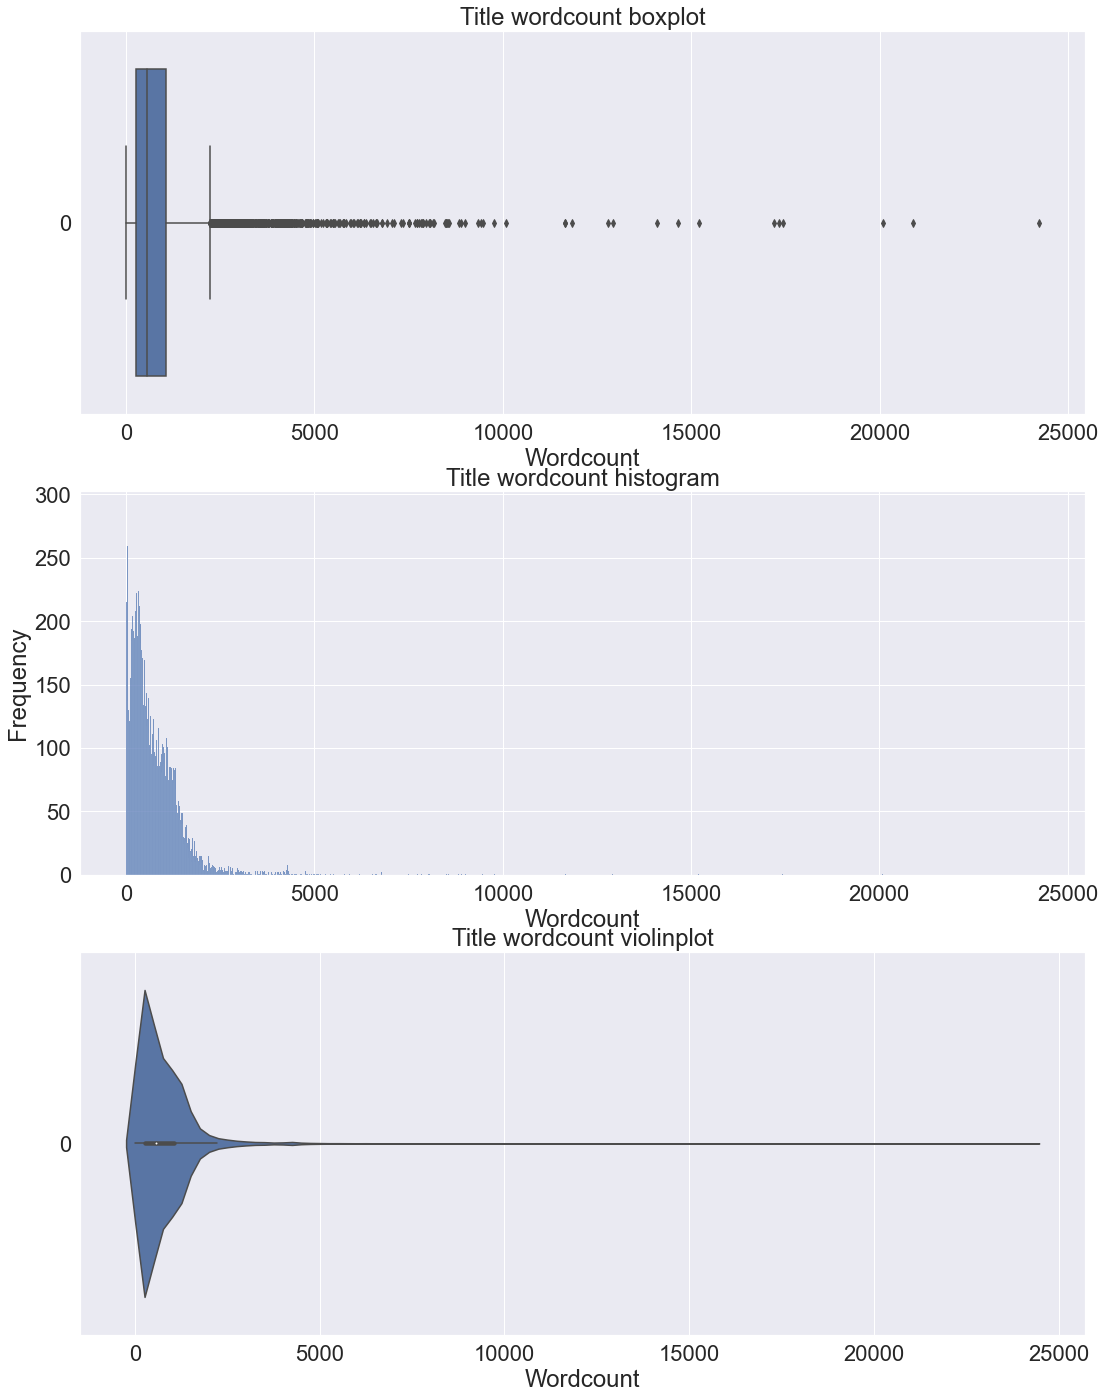

In [59]:
# Word count analysis (Text)
f, axes = plt.subplots(3, 1, figsize=(18, 24))

# Plot distribution graphs (Boxplot & histogram & violinplot)
sb.boxplot(data=news_data["text_wordcount"], orient = "h", ax=axes[0]).set(
    title="Title wordcount boxplot", 
    xlabel='Wordcount')
sb.histplot(data=news_data["text_wordcount"], binwidth=10, ax=axes[1]).set(
    title="Title wordcount histogram", 
    xlabel='Wordcount',
    ylabel='Frequency')
sb.violinplot(data=news_data["text_wordcount"], orient = "h", ax = axes[2]).set(
    title="Title wordcount violinplot", 
    xlabel='Wordcount')

In [60]:
# View stats
news_data['text_wordcount'].describe()

count    20584.000000
mean       762.882579
std        860.432471
min          1.000000
25%        271.000000
50%        561.000000
75%       1055.000000
max      24234.000000
Name: text_wordcount, dtype: float64

## Wordcount distribution across classes 

### Fake vs not fake wordcount

[Text(0.5, 1.0, 'Title wordcount comparision'),
 Text(0.5, 0, 'Wordcount'),
 Text(0, 0.5, 'Class')]

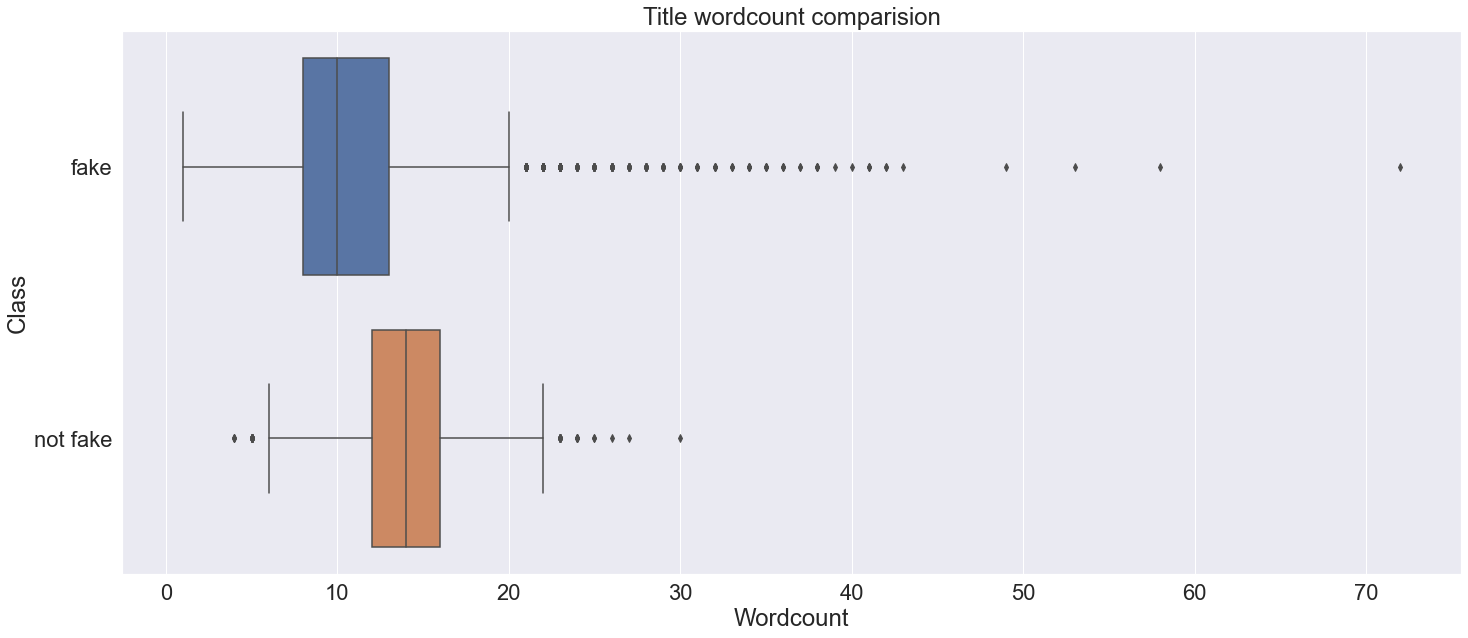

In [61]:
# Plot histogram for both real and fake news word count
f = plt.figure(figsize=(24,10))
sb.boxplot(x=news_data["title_wordcount"], y=news_data["label_translated"]).set(
    title="Title wordcount comparision", 
    xlabel='Wordcount',
    ylabel='Class')

In [62]:
# View stats
news_data.loc[news_data["label"] == 1]["title_wordcount"].describe()

count    10198.000000
mean        11.007845
std          4.664916
min          1.000000
25%          8.000000
50%         10.000000
75%         13.000000
max         72.000000
Name: title_wordcount, dtype: float64

In [63]:
# View stats
news_data.loc[news_data["label"] == 0]["title_wordcount"].describe()

count    10386.000000
mean        13.665126
std          2.913837
min          4.000000
25%         12.000000
50%         14.000000
75%         16.000000
max         30.000000
Name: title_wordcount, dtype: float64

[Text(0.5, 1.0, 'Text wordcount comparision'),
 Text(0.5, 0, 'Wordcount'),
 Text(0, 0.5, 'Class')]

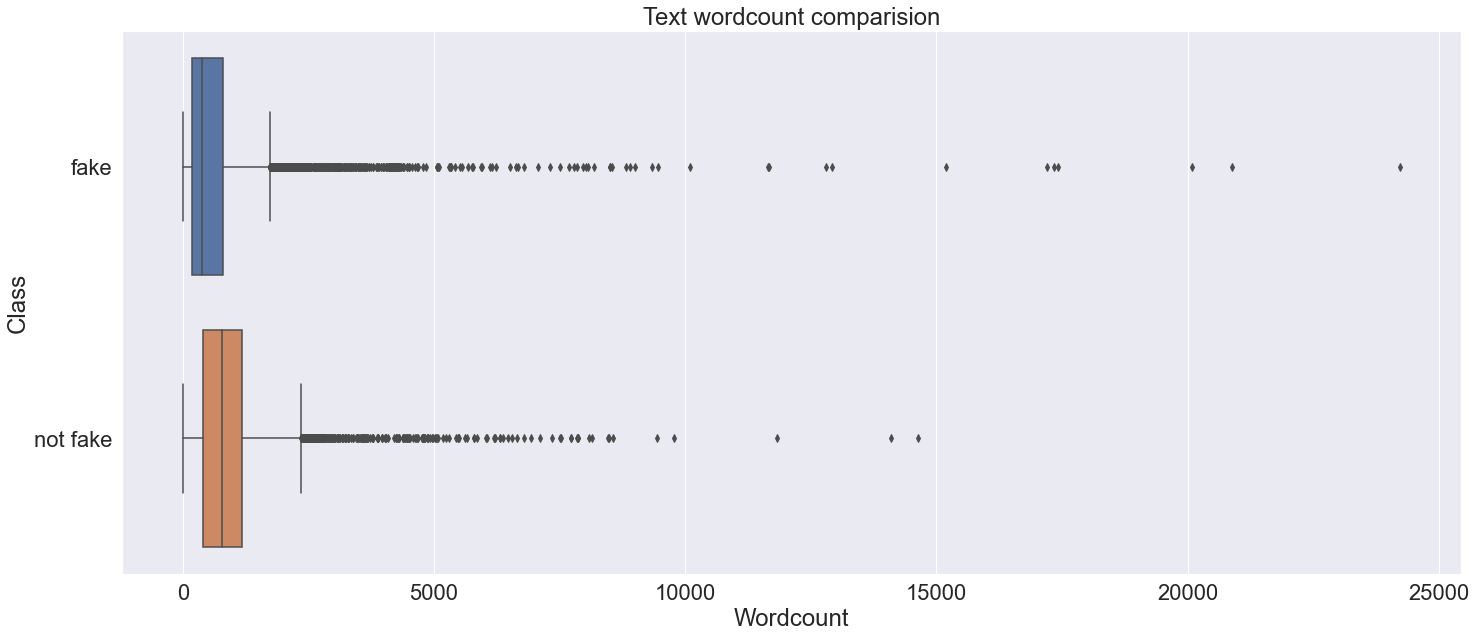

In [64]:
# Plot histogram for both real and fake news word count
f = plt.figure(figsize=(24,10))
sb.boxplot(x=news_data["text_wordcount"], y=news_data["label_translated"]).set(
    title="Text wordcount comparision", 
    xlabel='Wordcount',
    ylabel='Class')

In [65]:
# View stats
news_data.loc[news_data["label"] == 1]["text_wordcount"].describe()

count    10198.000000
mean       644.541969
std        953.896721
min          1.000000
25%        175.000000
50%        388.000000
75%        798.000000
max      24234.000000
Name: text_wordcount, dtype: float64

In [66]:
# View stats
news_data.loc[news_data["label"] == 0]["text_wordcount"].describe()

count    10386.000000
mean       879.081071
std        739.360884
min          1.000000
25%        400.250000
50%        773.000000
75%       1180.750000
max      14641.000000
Name: text_wordcount, dtype: float64

## Credible/un-credible authors analysis

### Most credible authors

[Text(0.5, 1.0, 'Top 10 un-credible authors'),
 Text(0.5, 0, 'Published'),
 Text(0, 0.5, 'Author')]

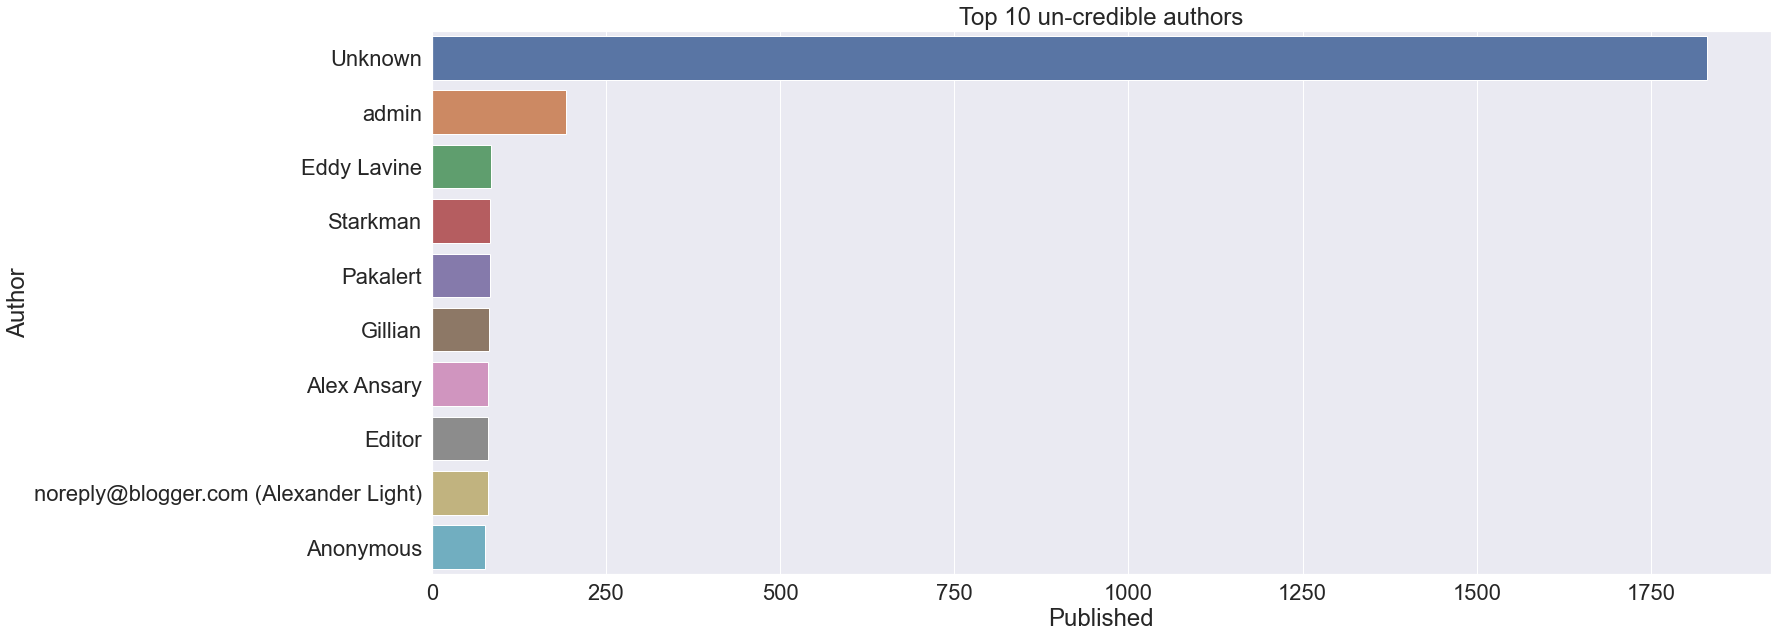

In [67]:
# Group by, summing count of rows with author with fake news
by_author = news_data[news_data['label_translated'] == 'fake'].groupby('author')['author'].count()
# Convert series data back into df
by_author = pd.DataFrame({'author':by_author.index, 'count':by_author.values})
# Sort to highest 
by_author = by_author.sort_values('count', ascending=False)[:10]

# Plot top 5 authors
f = plt.figure(figsize=(24,10))
sb.barplot(y="author", x="count", data=by_author, orient='h').set(
    title="Top 10 un-credible authors", 
    xlabel='Published', 
    ylabel='Author')

[Text(0.5, 1.0, 'Top 10 credible authors'),
 Text(0.5, 0, 'Published'),
 Text(0, 0.5, 'Author')]

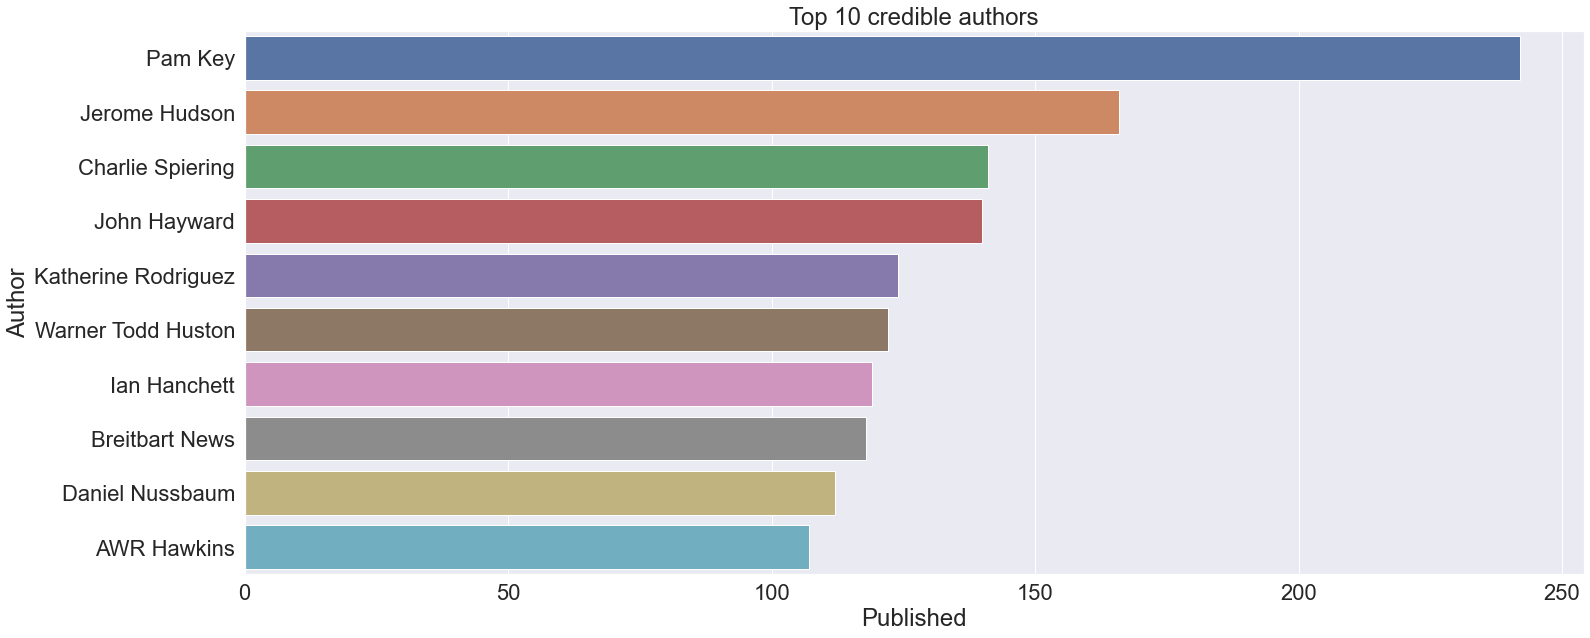

In [68]:
# Group by, summing count of rows with author with fake news
by_author = news_data[news_data['label_translated'] == 'not fake'].groupby('author')['author'].count()
# Convert series data back into df
by_author = pd.DataFrame({'author':by_author.index, 'count':by_author.values})
# Sort to highest 
by_author = by_author.sort_values('count', ascending=False)[:10]

# Plot top 5 authors
f = plt.figure(figsize=(24,10))
sb.barplot(y="author", x="count", data=by_author, orient='h').set(
    title="Top 10 credible authors", 
    xlabel='Published', 
    ylabel='Author')

## Corpus Analysis

### Frequent terms for title

In [69]:
# Function for getting top N words
def top_words(data, n):
    # Tokenize data for each row
    corpus = data.str.split()

    # Combine each row into a list
    corpus = corpus.values.tolist()

    # Combine each list to form a massive list
    flat_corpus = []
    for sublist in corpus:
        for item in sublist:
            flat_corpus.append(item)

    # Use collection.counter to sum up the frequency of each word
    corpus_frequency = Counter(flat_corpus)

    # Get the most common words
    most_common_words = corpus_frequency.most_common()

    # Limit to top 10 words
    most_common_words = most_common_words[:n]

    # Unzip list into 2 different lists, word list and frequency list
    word, freq = zip(*most_common_words)

    # Convert to list for plotting
    word, freq = list(word), list(freq)
    
    return word, freq

In [70]:
# Function to auto plot wordcloud based on the top n words
def generate_wordcloud(data, n):
    # Get top word and freq in list format
    word, freq = top_words(data, n)
    
    # Transform them into dict key value pairs, key being the word and value being freq
    word_dict = dict(zip(word, freq))
    
    # Plotting wordcloud
    f = plt.figure(figsize=(24,10))
    wordcloud = WordCloud(background_color='white',
                          stopwords=my_stopwords,
                          max_words=n,
                          max_font_size=30,
                          scale=10,
                          random_state=1).generate_from_frequencies(word_dict)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

[Text(0.5, 1.0, 'Frequent terms for title'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Terms')]

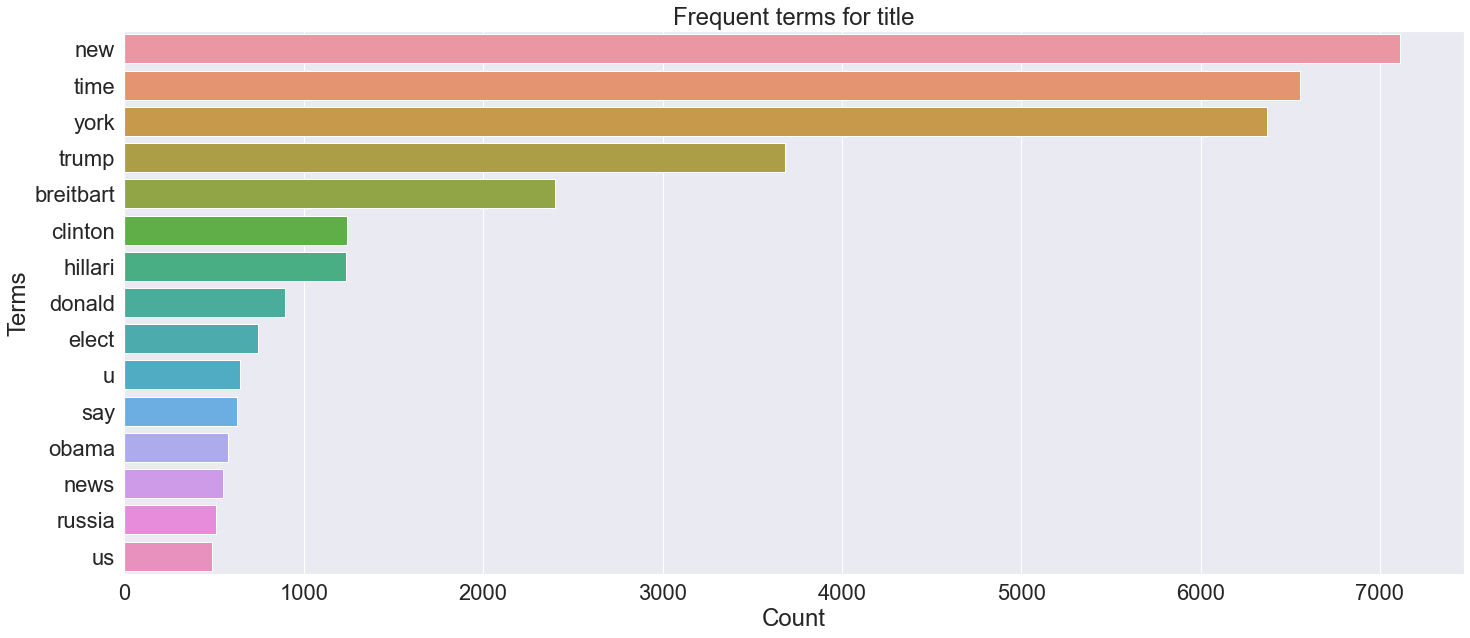

In [71]:
# Get top 15 words for title
word, freq = top_words(news_data["title"], 15)

# Plot the bar graph
f = plt.figure(figsize=(24,10))
sb.barplot(y=word, x=freq, orient='h').set(
    title="Frequent terms for title", 
    xlabel='Count', 
    ylabel='Terms')

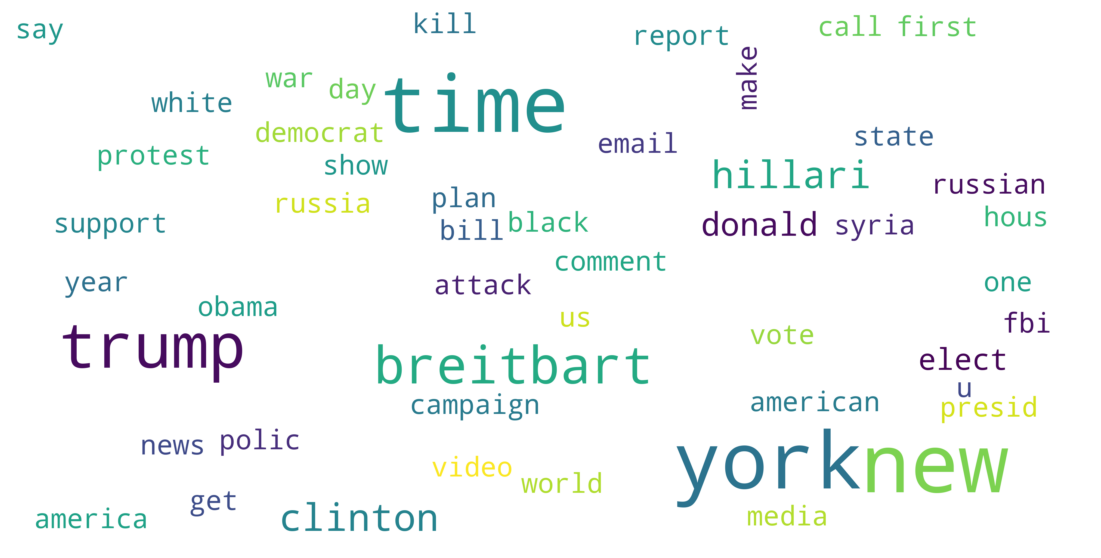

In [72]:
# Plot top 50 words in wordcloud
generate_wordcloud(news_data["title"], 50)

### Frequent terms for text

[Text(0.5, 1.0, 'Frequent terms for text'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Terms')]

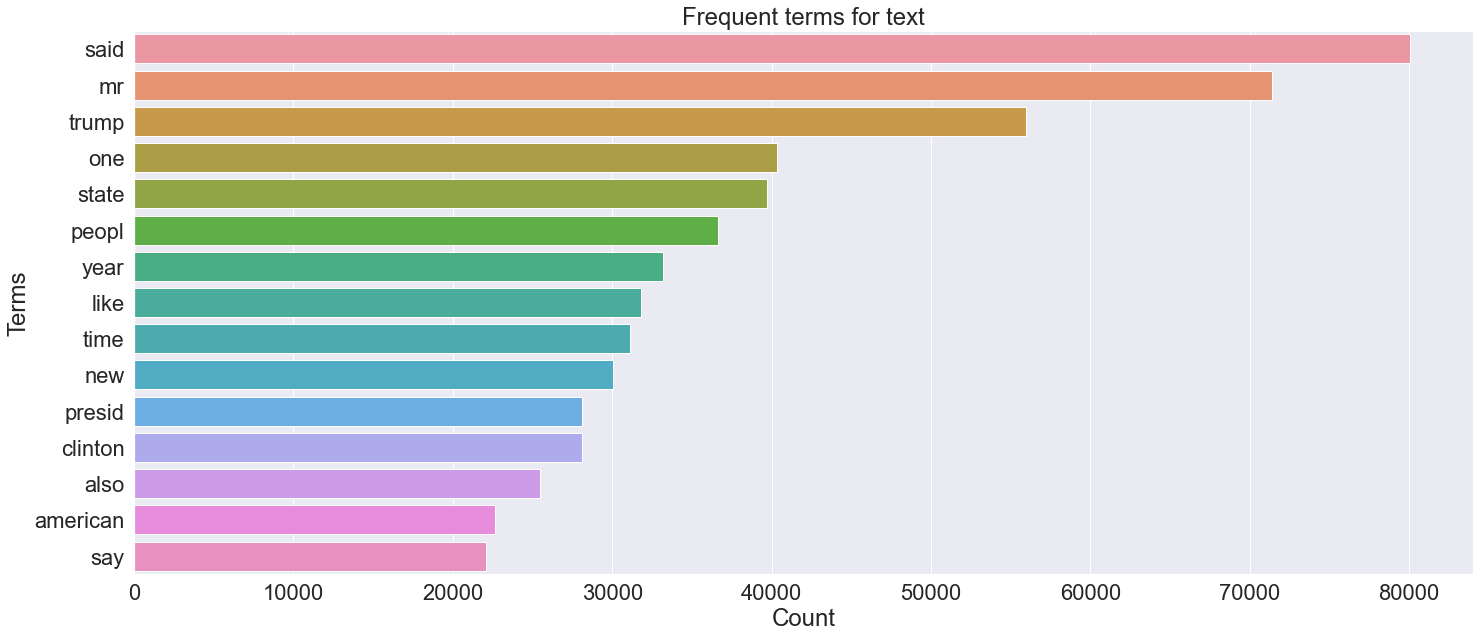

In [73]:
# Get the top 15 words in text column
word, freq = top_words(news_data["text"], 15)

# Plot the bar graph
f = plt.figure(figsize=(24,10))
sb.barplot(y=word, x=freq, orient='h').set(
    title="Frequent terms for text", 
    xlabel='Count', 
    ylabel='Terms')

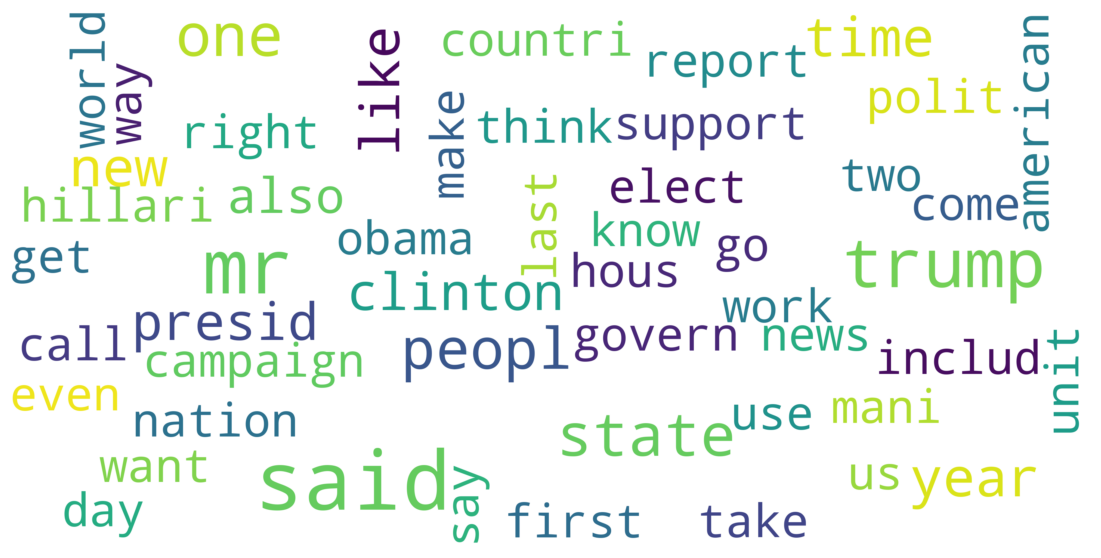

In [74]:
# Plot top 50 words in wordcloud
generate_wordcloud(news_data["text"], 50)

### Frequent terms comparision between classes

[Text(0.5, 1.0, 'Frequent terms for title (not fake)'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Terms')]

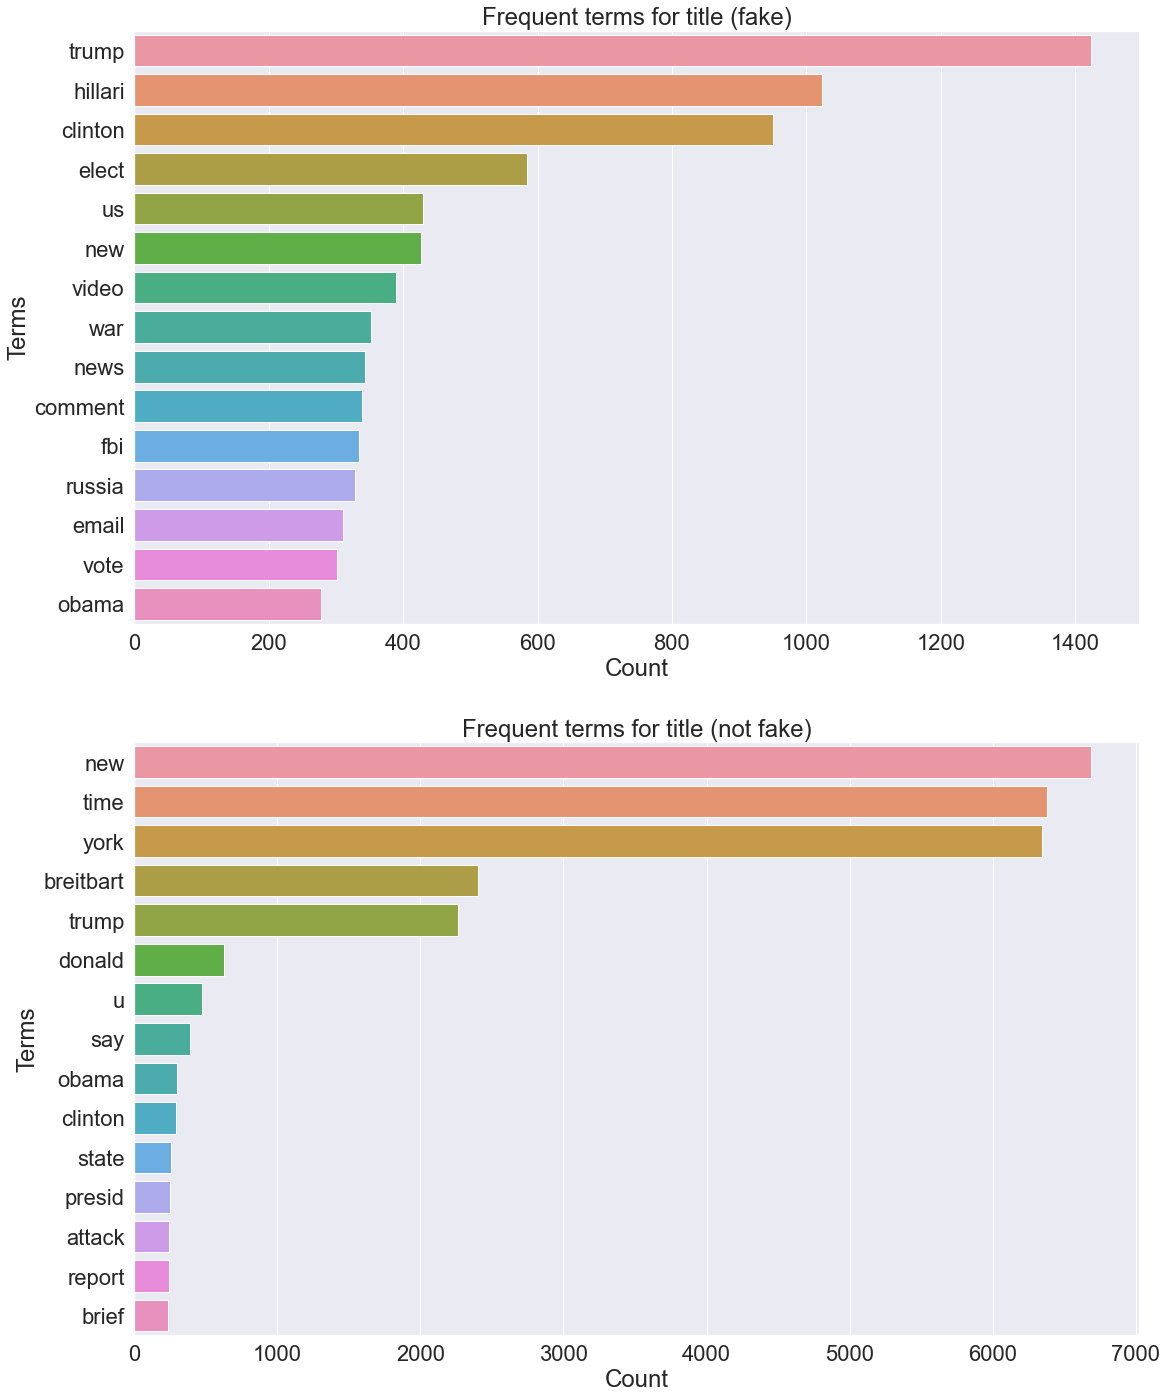

In [75]:
# Filter fake news title
fake_news_words = news_data.loc[news_data['label_translated'] == 'fake']['title']
real_news_words = news_data.loc[news_data['label_translated'] == 'not fake']['title']

# Get top 15 words for fake and not fake news
fake_word, fake_freq = top_words(fake_news_words, 15)
real_word, real_freq = top_words(real_news_words, 15)

# Plot the bar graph
f, axes = plt.subplots(2, 1, figsize=(18, 24))
sb.barplot(y=fake_word, x=fake_freq, ax=axes[0], orient="h").set(
    title="Frequent terms for title (fake)", 
    xlabel='Count', 
    ylabel='Terms')

# Do the same for the other class
sb.barplot(y=real_word, x=real_freq, ax=axes[1], orient="h").set(
    title="Frequent terms for title (not fake)", 
    xlabel='Count', 
    ylabel='Terms')

[Text(0.5, 1.0, 'Frequent terms for text (not fake)'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Terms')]

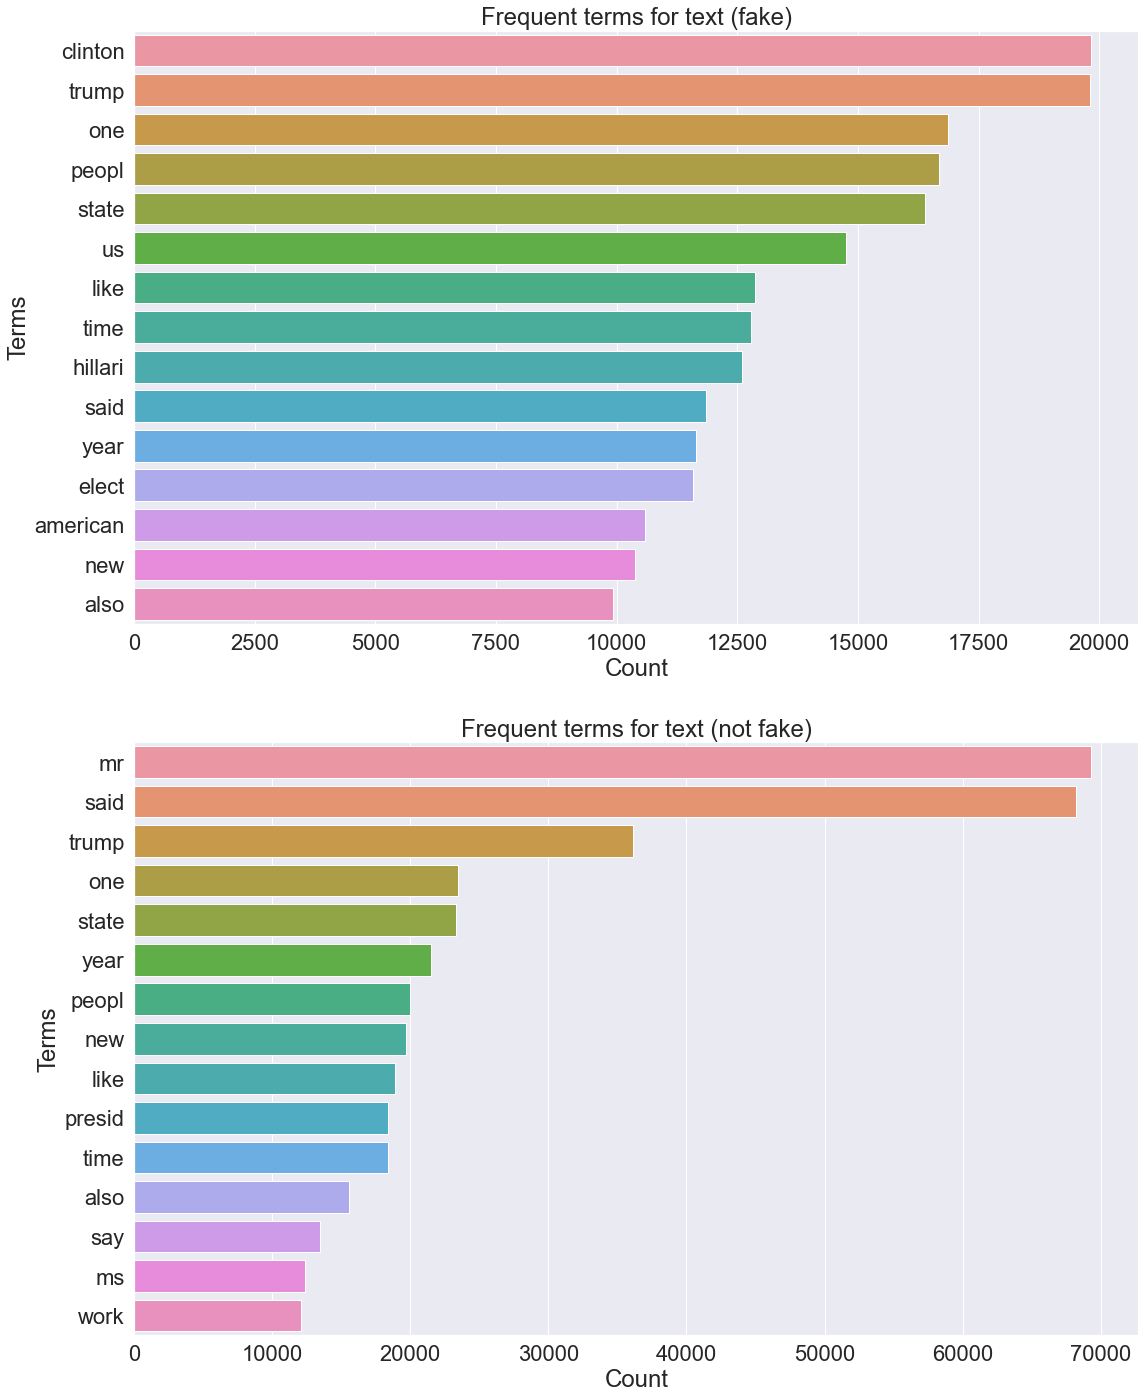

In [76]:
# Filter fake news text
fake_news_words = news_data.loc[news_data['label_translated'] == 'fake']['text']
real_news_words = news_data.loc[news_data['label_translated'] == 'not fake']['text']

# Get top 15 words for fake and not fake news
fake_word, fake_freq = top_words(fake_news_words, 15)
real_word, real_freq = top_words(real_news_words, 15)

# Plot the bar graph
f, axes = plt.subplots(2, 1, figsize=(18, 24))
sb.barplot(y=fake_word, x=fake_freq, ax=axes[0], orient="h").set(
    title="Frequent terms for text (fake)", 
    xlabel='Count', 
    ylabel='Terms')

# Do the same for the other class
sb.barplot(y=real_word, x=real_freq, ax=axes[1], orient="h").set(
    title="Frequent terms for text (not fake)", 
    xlabel='Count', 
    ylabel='Terms')

## N-gram analysis (Bi-gram)

In [77]:
# Data = which column you want to analyse?
# n_gram_value = Bi-gram? Tri-gram? Value of the n-gram
# n = top n words

# Function to return a tuple containing ngram word and its corresponding frequency
def n_gram_analysis(data, n_gram_value, n):
    # Use countvectorizer for n-gram analysis
    # Init CountVectorizer object
    cv = CountVectorizer(lowercase=True, ngram_range=(n_gram_value, n_gram_value))

    # Learn the vocabulary dictionary and return document-term matrix
    # Convert a collection of text documents to a matrix of token counts
    news_data_freq = cv.fit_transform(data)

    # Sum all rows
    news_data_freq_sum = news_data_freq.sum(axis=0)

    # A mapping of terms to feature indices
    # Map each n-gram terms to its frequency
    word_mapping = []
    for word, map_index in cv.vocabulary_.items():
        word_mapping.append((word, news_data_freq_sum[0, map_index]))

    # Sort in decending order
    # Sort array based on 2nd value (Frequency)
    # And limit to top 10 results
    word_mapping =sorted(word_mapping, key = lambda x: x[1], reverse=True)[:n]


    # Unzip list into 2 different lists, word list and frequency list
    word, freq = zip(*word_mapping)

    # Convert to list for plotting
    word, freq = list(word), list(freq)
    
    return word, freq

In [78]:
# Function to generate wordcloud based on ngram
def generate_wordcloud_ngram(data, n_gram_value, n):
    # Get top word and freq in list format
    word, freq = n_gram_analysis(data, n_gram_value, n)
    
    # Transform them into dict key value pairs, key being the word and value being freq
    word_dict = dict(zip(word, freq))
    
    # Plotting wordcloud
    f = plt.figure(figsize=(24,10))
    wordcloud = WordCloud(background_color='white',
                          stopwords=my_stopwords,
                          max_words=n,
                          max_font_size=30,
                          scale=5,
                          random_state=1).generate_from_frequencies(word_dict)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

### Frequent bi-grams

[Text(0.5, 1.0, 'Frequent bigrams for title'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Bigram')]

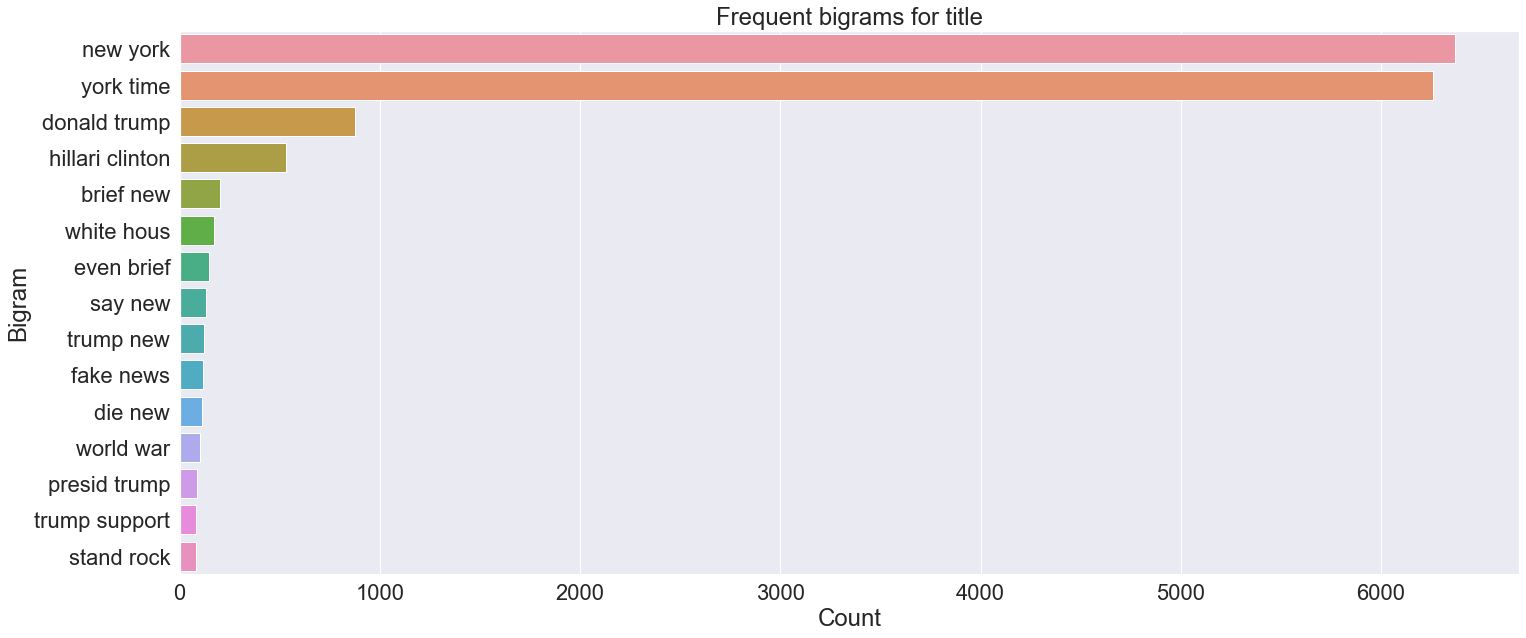

In [79]:
# Transform fakenews data into ngram list for plotting
word, freq = n_gram_analysis(news_data['title'], 2, 15)

# Plot the bar graph
f = plt.figure(figsize=(24,10))
sb.barplot(y=word, x=freq, orient='h').set(
    title="Frequent bigrams for title", 
    xlabel='Count', 
    ylabel='Bigram')

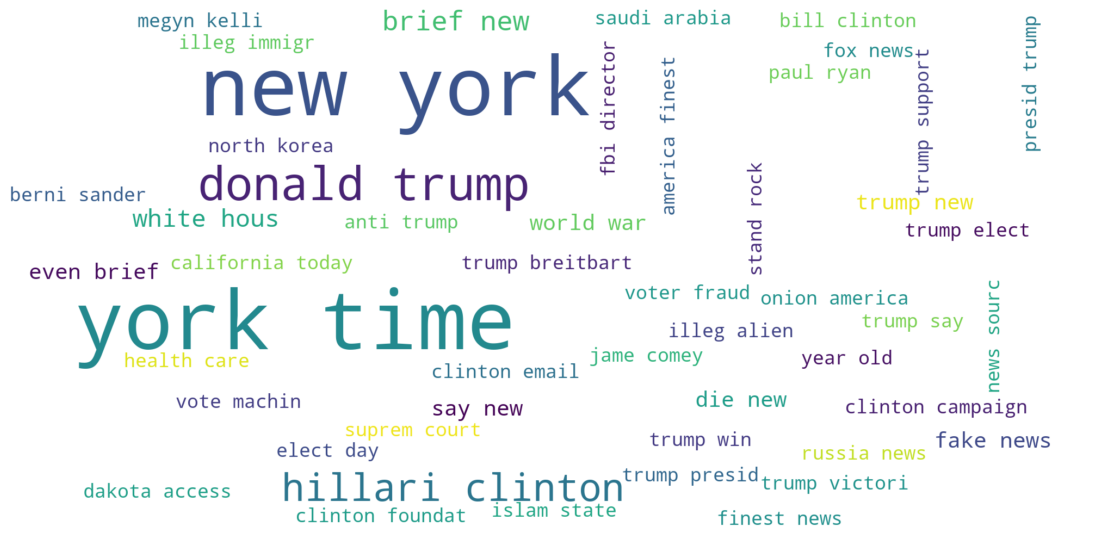

In [80]:
# Plot wordcloud
generate_wordcloud_ngram(news_data["title"], 2, 50)

[Text(0.5, 1.0, 'Frequent bigrams for text'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Bigram')]

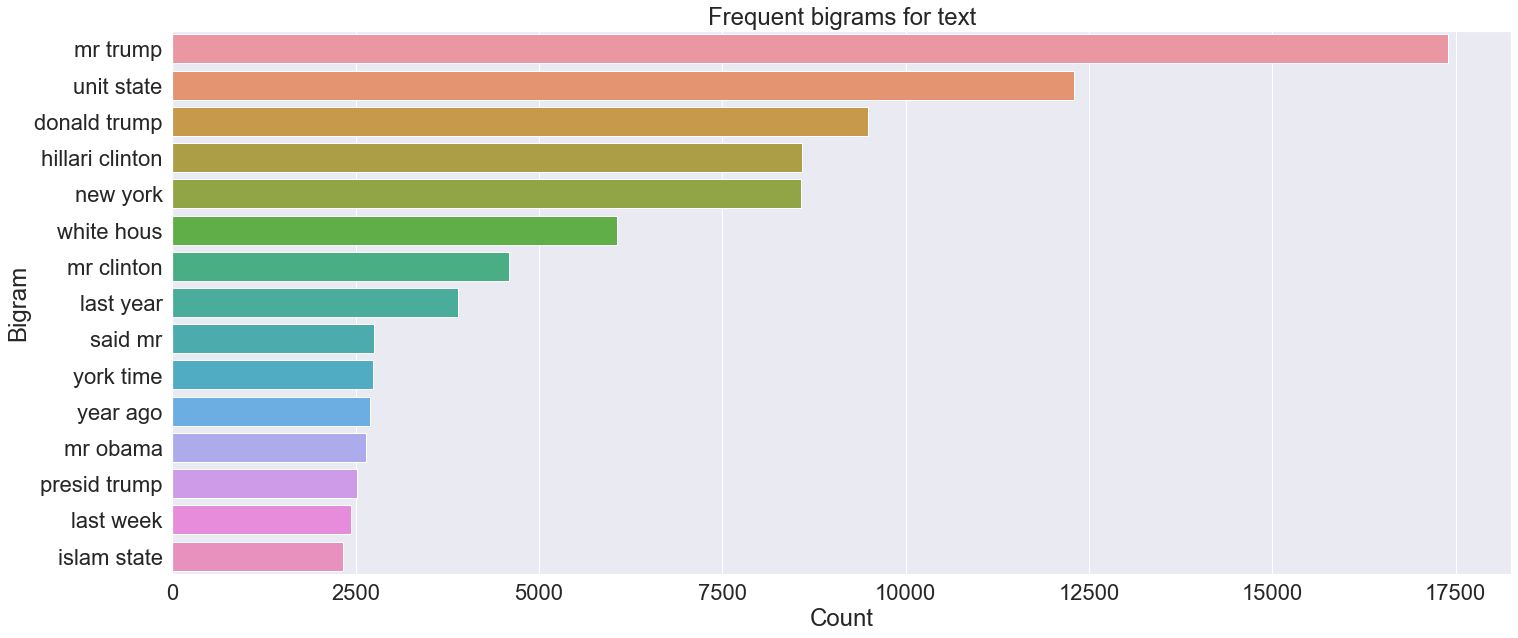

In [81]:
# Transform fakenews data into ngram list for plotting
word, freq = n_gram_analysis(news_data['text'], 2, 15)

# Plot the bar graph
f = plt.figure(figsize=(24,10))
sb.barplot(y=word, x=freq, orient='h').set(
    title="Frequent bigrams for text", 
    xlabel='Count', 
    ylabel='Bigram')

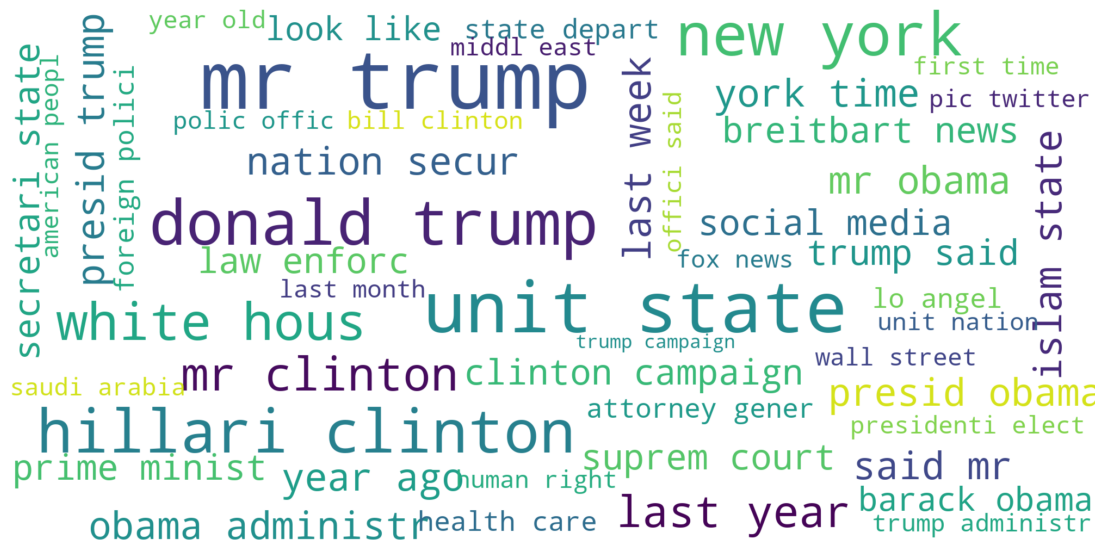

In [82]:
# Plot wordcloud
generate_wordcloud_ngram(news_data["text"], 2, 50)

### Frequent bi-grams comparision between classes

[Text(0.5, 1.0, 'Frequent bigrams for title (Not fake)'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Bigram')]

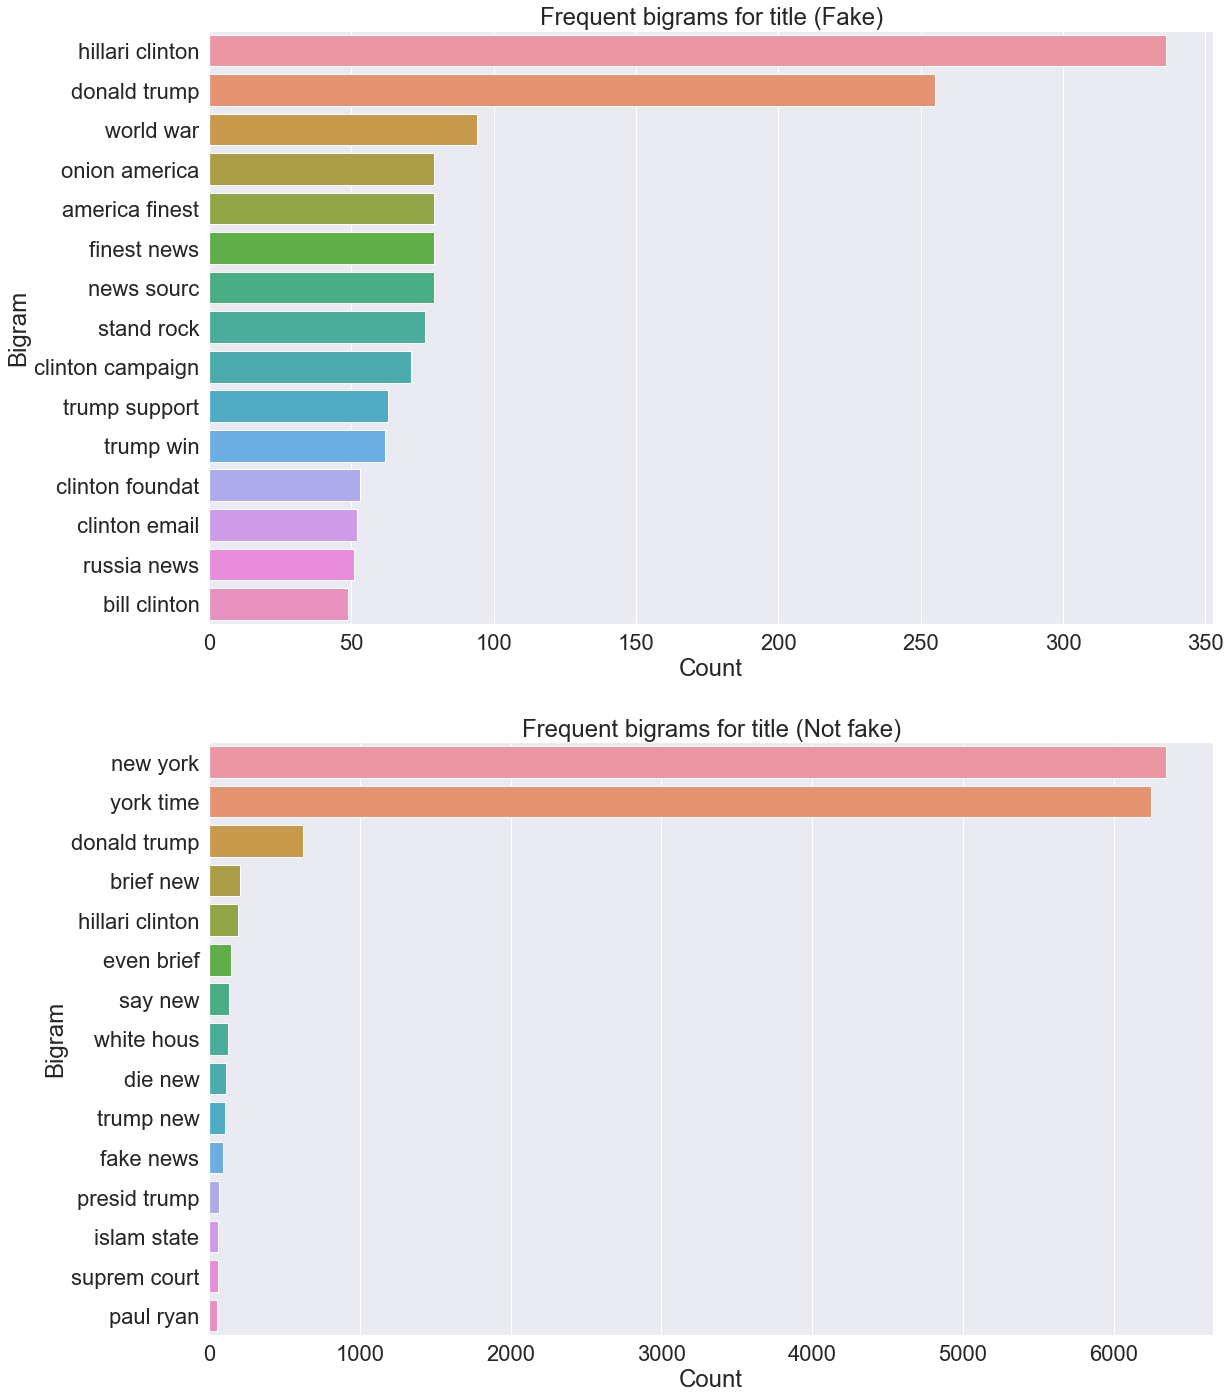

In [83]:
# Filter fake news title
fake_news_words = news_data.loc[news_data['label_translated'] == 'fake']['title']
real_news_words = news_data.loc[news_data['label_translated'] == 'not fake']['title']

fake_word, fake_freq = n_gram_analysis(fake_news_words, 2, 15)
real_word, real_freq = n_gram_analysis(real_news_words, 2, 15)

# Plot the bar graph
f, axes = plt.subplots(2, 1, figsize=(18, 24))
sb.barplot(y=fake_word, x=fake_freq, ax=axes[0], orient='h').set(
    title="Frequent bigrams for title (Fake)", 
    xlabel='Count', 
    ylabel='Bigram')

sb.barplot(y=real_word, x=real_freq, ax=axes[1], orient='h').set(
    title="Frequent bigrams for title (Not fake)", 
    xlabel='Count', 
    ylabel='Bigram')

[Text(0.5, 1.0, 'Frequent bigrams for text (Not fake)'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'Bigram')]

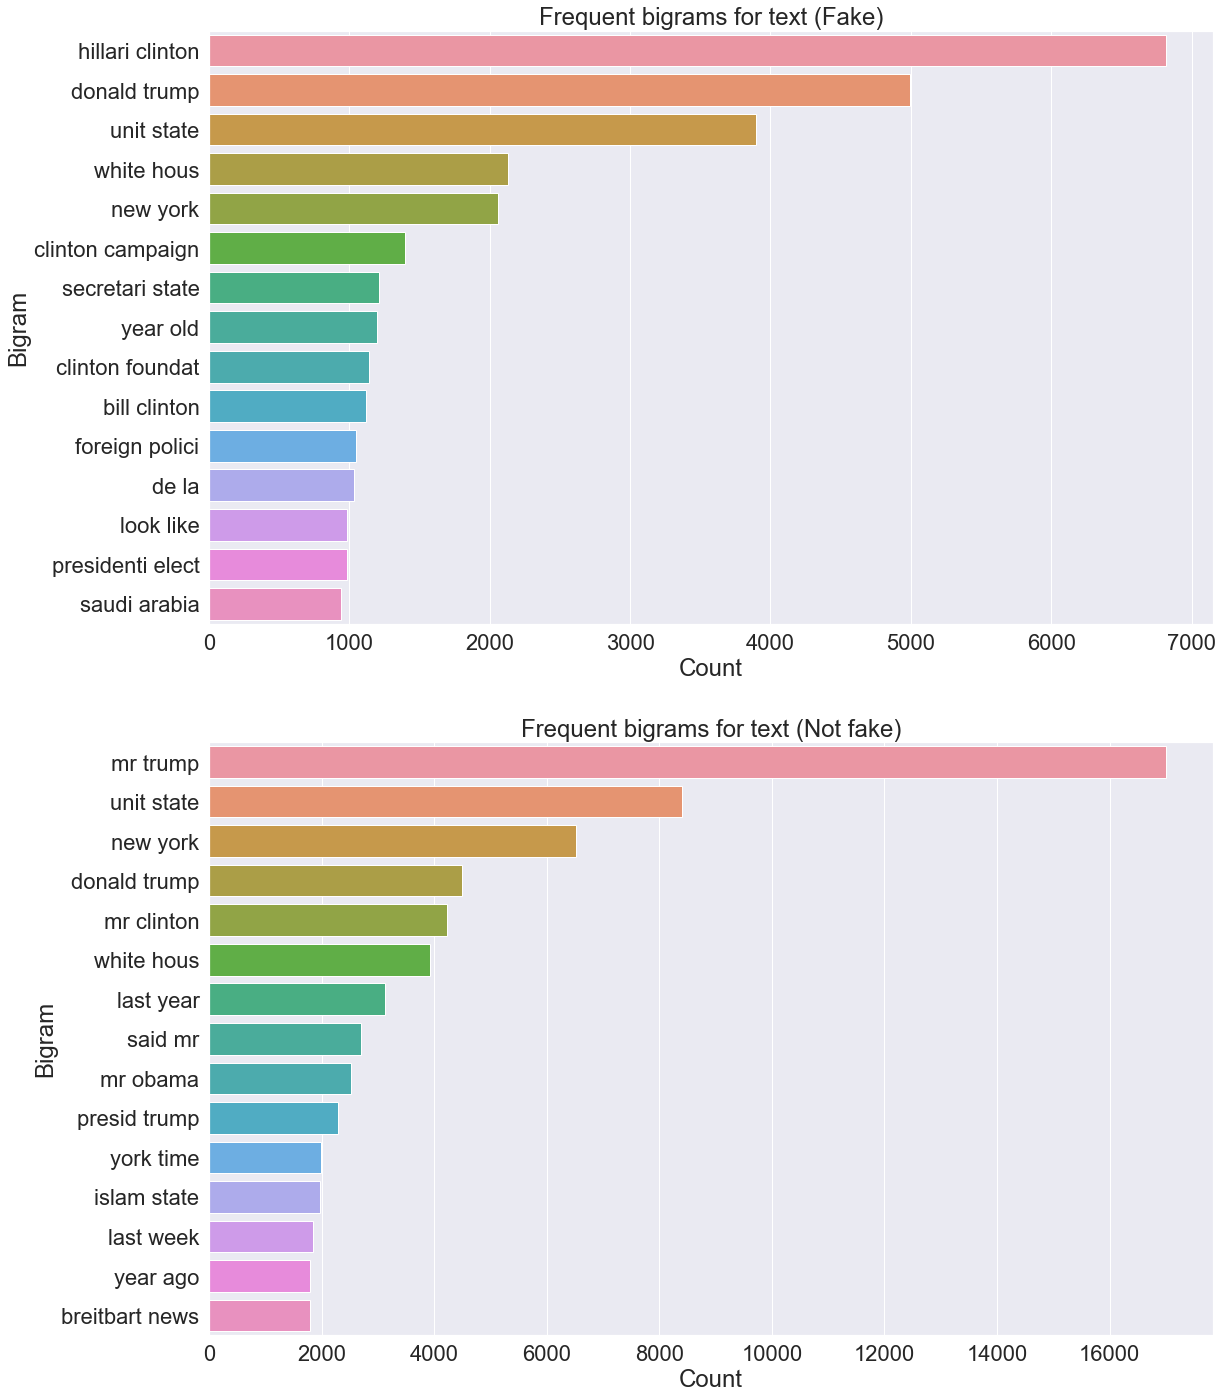

In [84]:
# Filter fake news title
fake_news_words = news_data.loc[news_data['label_translated'] == 'fake']['text']
real_news_words = news_data.loc[news_data['label_translated'] == 'not fake']['text']

fake_word, fake_freq = n_gram_analysis(fake_news_words, 2, 15)
real_word, real_freq = n_gram_analysis(real_news_words, 2, 15)

# Plot the bar graph
f, axes = plt.subplots(2, 1, figsize=(18, 24))
sb.barplot(y=fake_word, x=fake_freq, ax=axes[0], orient="h").set(
    title="Frequent bigrams for text (Fake)", 
    xlabel='Count', 
    ylabel='Bigram')

sb.barplot(y=real_word, x=real_freq, ax=axes[1], orient="h").set(
    title="Frequent bigrams for text (Not fake)", 
    xlabel='Count', 
    ylabel='Bigram')

## Sentiment & Emotions Analysis

### Sentiment

[Text(0.5, 1.0, 'Text polarity analysis (Pos vs Neg)'),
 Text(0.5, 0, 'Polarity'),
 Text(0, 0.5, 'Count')]

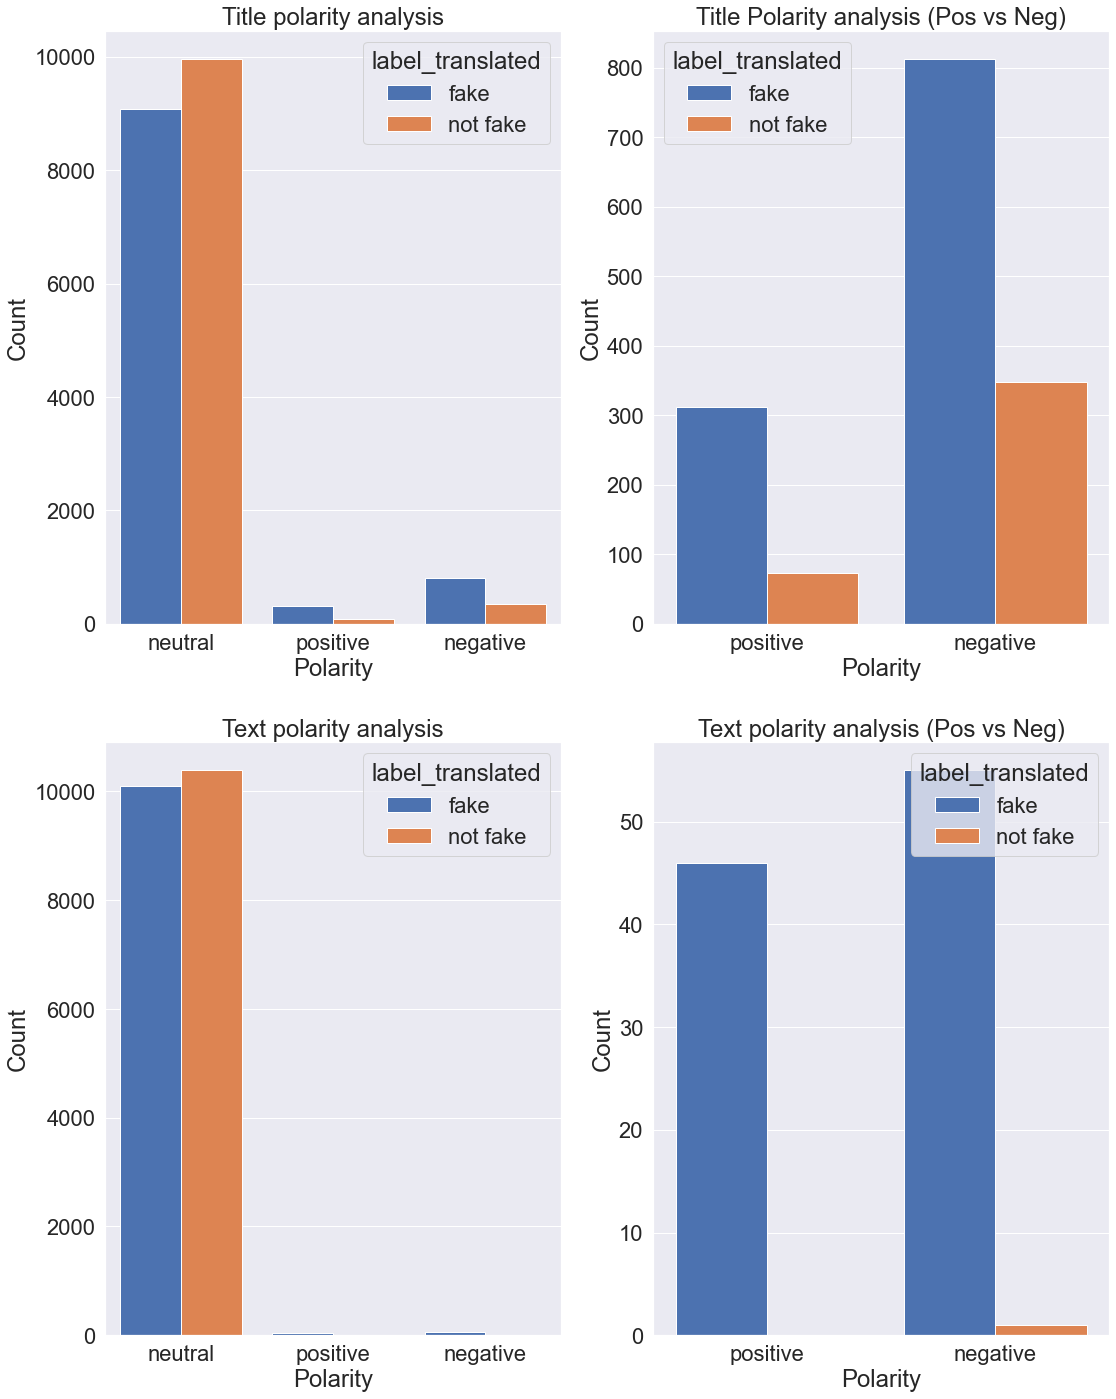

In [85]:
# Define consistent ordering in the graphs
order = ['neutral', 'positive', 'negative']
order_simplified =['positive', 'negative']

# Plot the bar graphs
f, axes = plt.subplots(2, 2, figsize=(18, 24))
sb.countplot(x='title_polarity', 
             hue='label_translated', 
             data=news_data, 
             ax=axes[0, 0], 
             saturation=1, 
             order=order
            ).set(title="Title polarity analysis", 
                  xlabel='Polarity', 
                  ylabel='Count')

sb.countplot(x='title_polarity', 
             hue='label_translated', 
             data=news_data, 
             ax=axes[0, 1], 
             saturation=1, 
             order=order_simplified
            ).set(title="Title Polarity analysis (Pos vs Neg)", 
                  xlabel='Polarity', 
                  ylabel='Count')

sb.countplot(x='text_polarity', 
             hue='label_translated', 
             data=news_data, 
             ax=axes[1, 0], 
             saturation=1, 
             order=order
            ).set(title="Text polarity analysis", 
                  xlabel='Polarity', 
                  ylabel='Count')

sb.countplot(x='text_polarity', 
             hue='label_translated', 
             data=news_data, 
             ax=axes[1, 1], 
             saturation=1, 
             order=order_simplified
            ).set(title="Text polarity analysis (Pos vs Neg)", 
                  xlabel='Polarity', 
                  ylabel='Count')

### Emotion

[Text(0.5, 1.0, 'Text emotion analysis'),
 Text(0.5, 0, 'Emotion'),
 Text(0, 0.5, 'Count')]

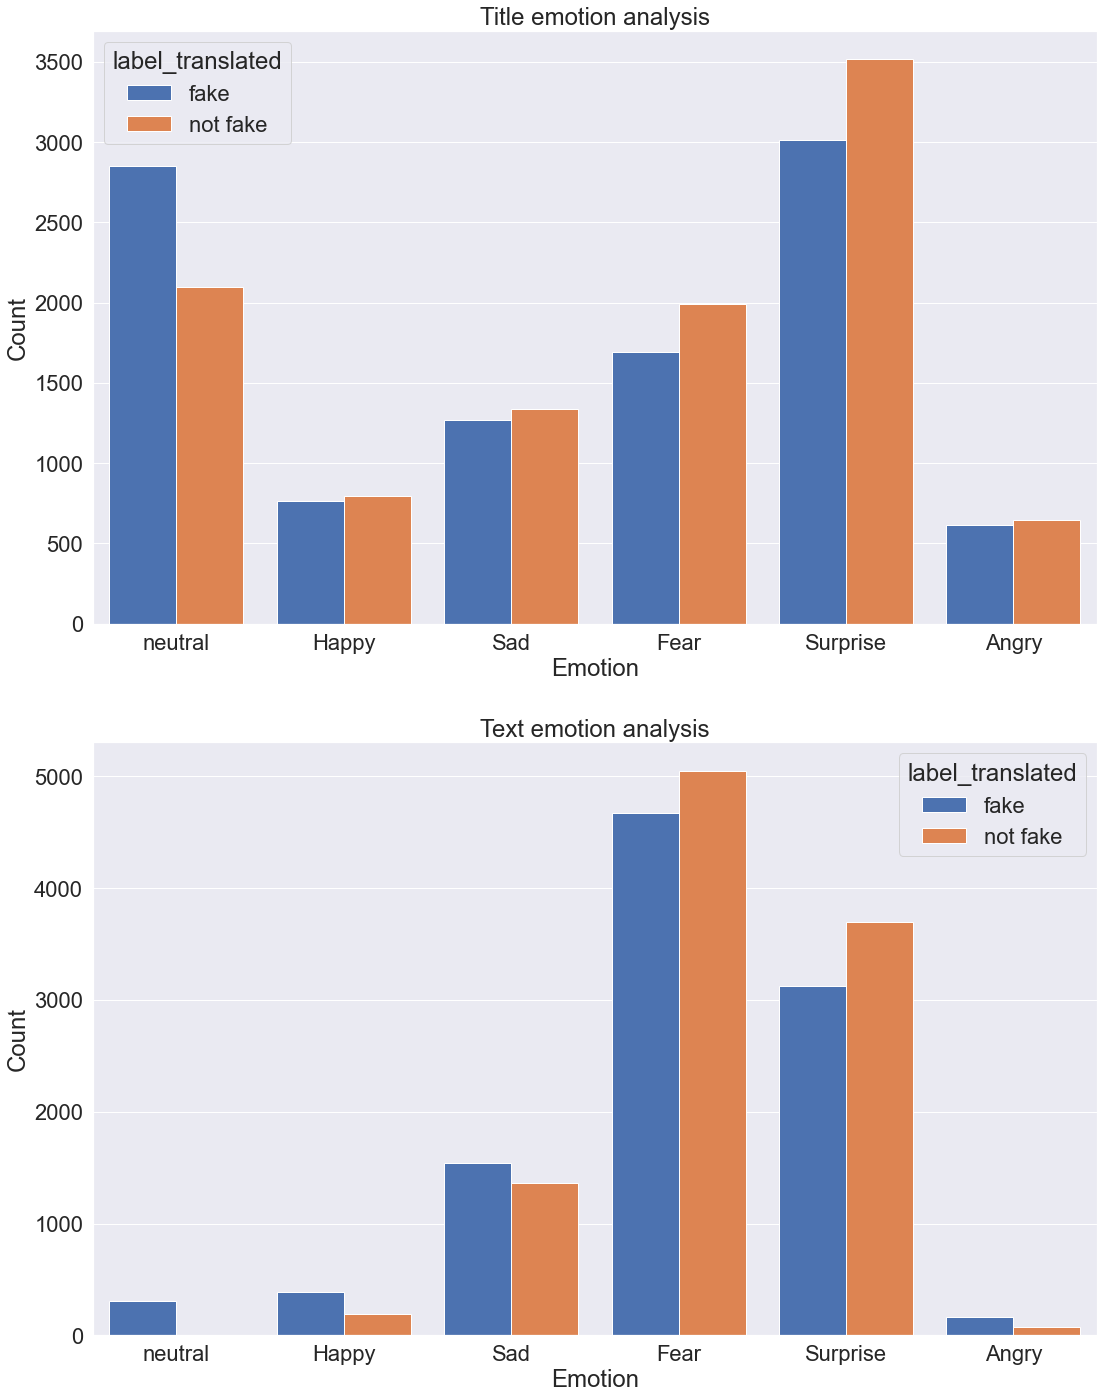

In [86]:
# Define consistent ordering in the graphs
order = ['neutral', 'Happy', 'Sad', 'Fear', 'Surprise', 'Angry']
f, axes = plt.subplots(2, 1, figsize=(18, 24))
sb.countplot(x='title_emotion', 
             hue='label_translated', 
             data=news_data, 
             ax=axes[0], 
             saturation=1, 
             order=order
            ).set(title="Title emotion analysis", 
                  xlabel='Emotion', 
                  ylabel='Count')

# Plot the bargraphs
sb.countplot(x='text_emotion', 
             hue='label_translated', 
             data=news_data, 
             ax=axes[1], 
             saturation=1, 
             order=order
            ).set(title="Text emotion analysis", 
                  xlabel='Emotion', 
                  ylabel='Count')

## Stopwords Analysis

[Text(0.5, 1.0, 'Title stopwords'),
 Text(0.5, 0, 'Stopwords count'),
 Text(0, 0.5, '')]

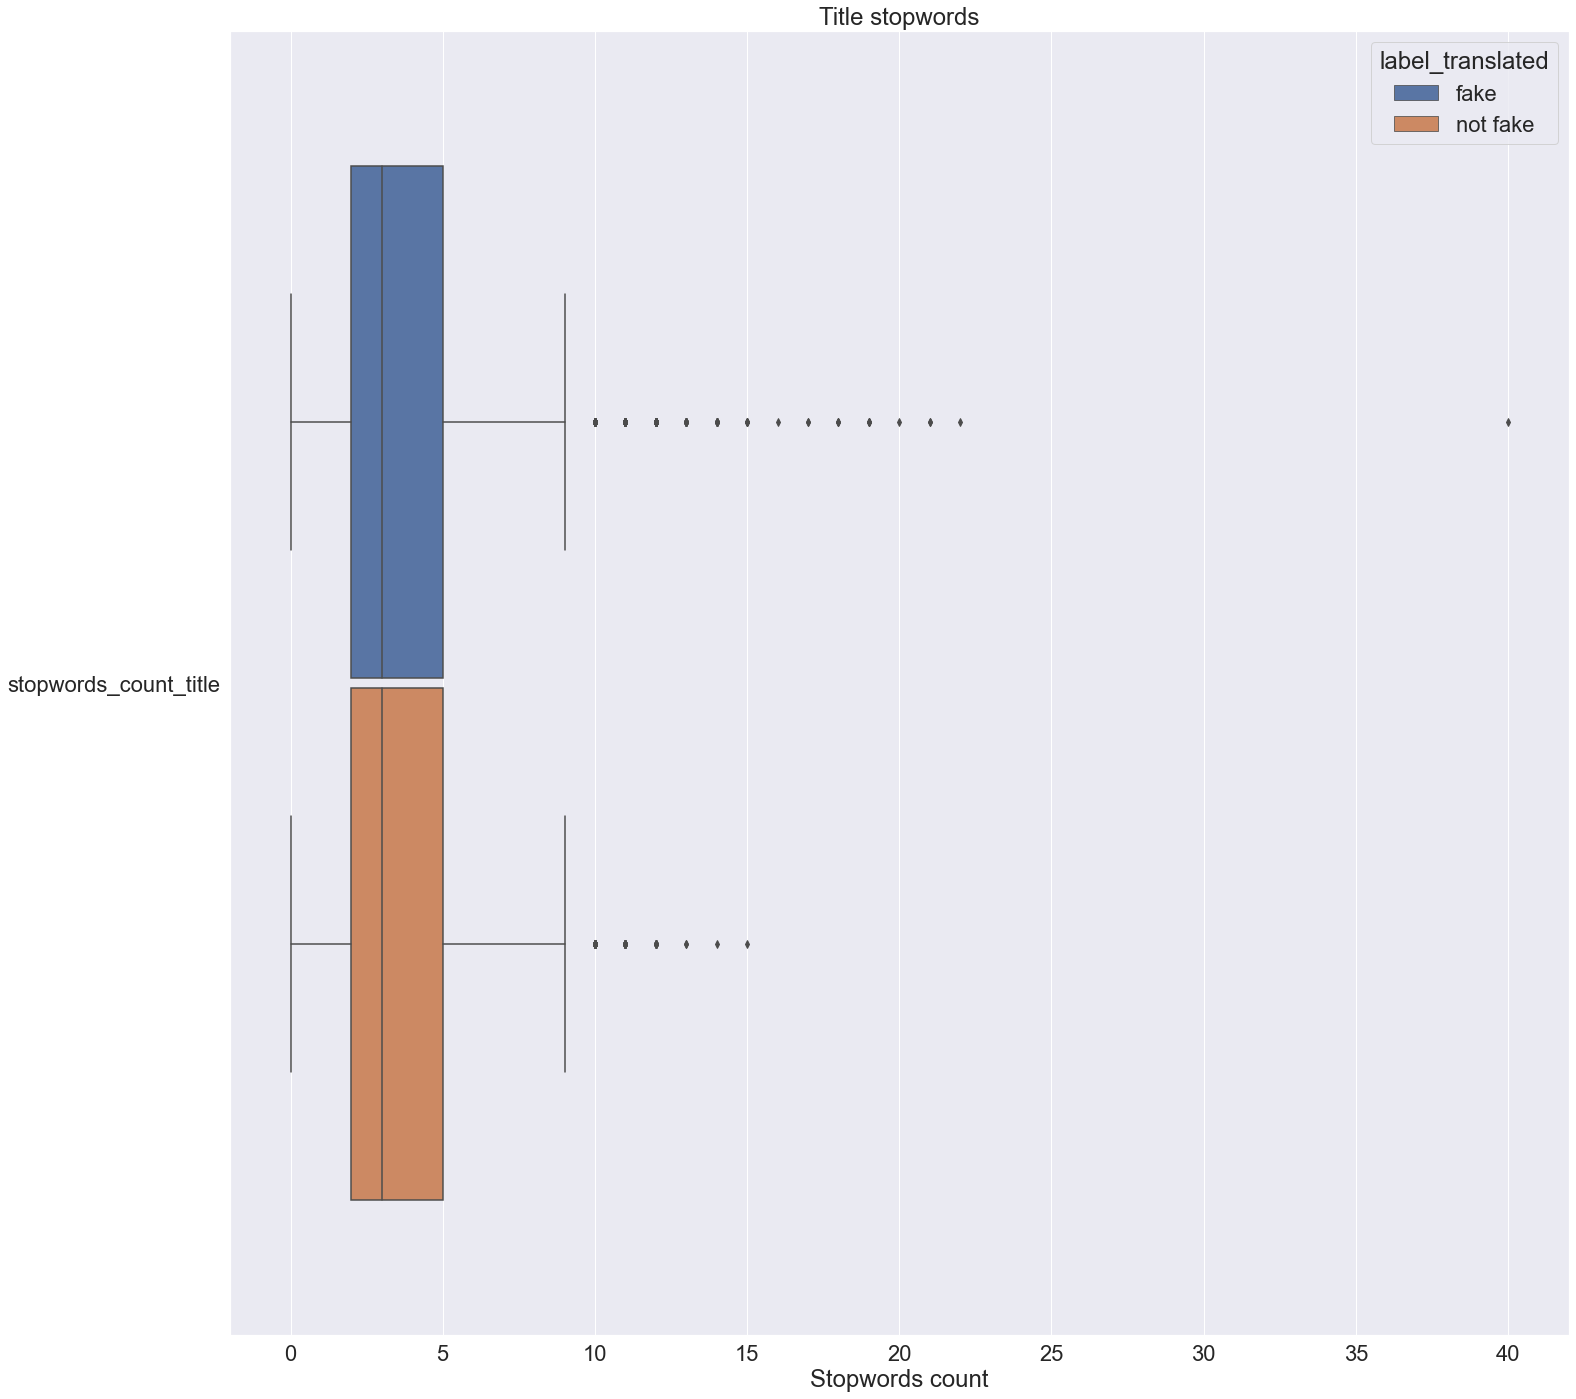

In [87]:
# Isolating required data
f = plt.figure(figsize=(24,24))
pos_df = pd.concat([news_data["stopwords_count_title"],  
                    news_data["label_translated"]], axis = 1)

# Un-pivot dataframe column as rows so in order to plot both at the same graph, same axis
pos_df = pd.melt(pos_df, id_vars=['label_translated'], var_name=['Stopword'])

# Plot boxplot
sb.boxplot(x='value', y = "Stopword", hue = "label_translated", data = pos_df, orient = "h", showfliers = True).set(title="Title stopwords", 
                                                                                                                    xlabel='Stopwords count',
                                                                                                                    ylabel='')

[Text(0.5, 1.0, 'Text stopwords'),
 Text(0.5, 0, 'Stopwords count'),
 Text(0, 0.5, '')]

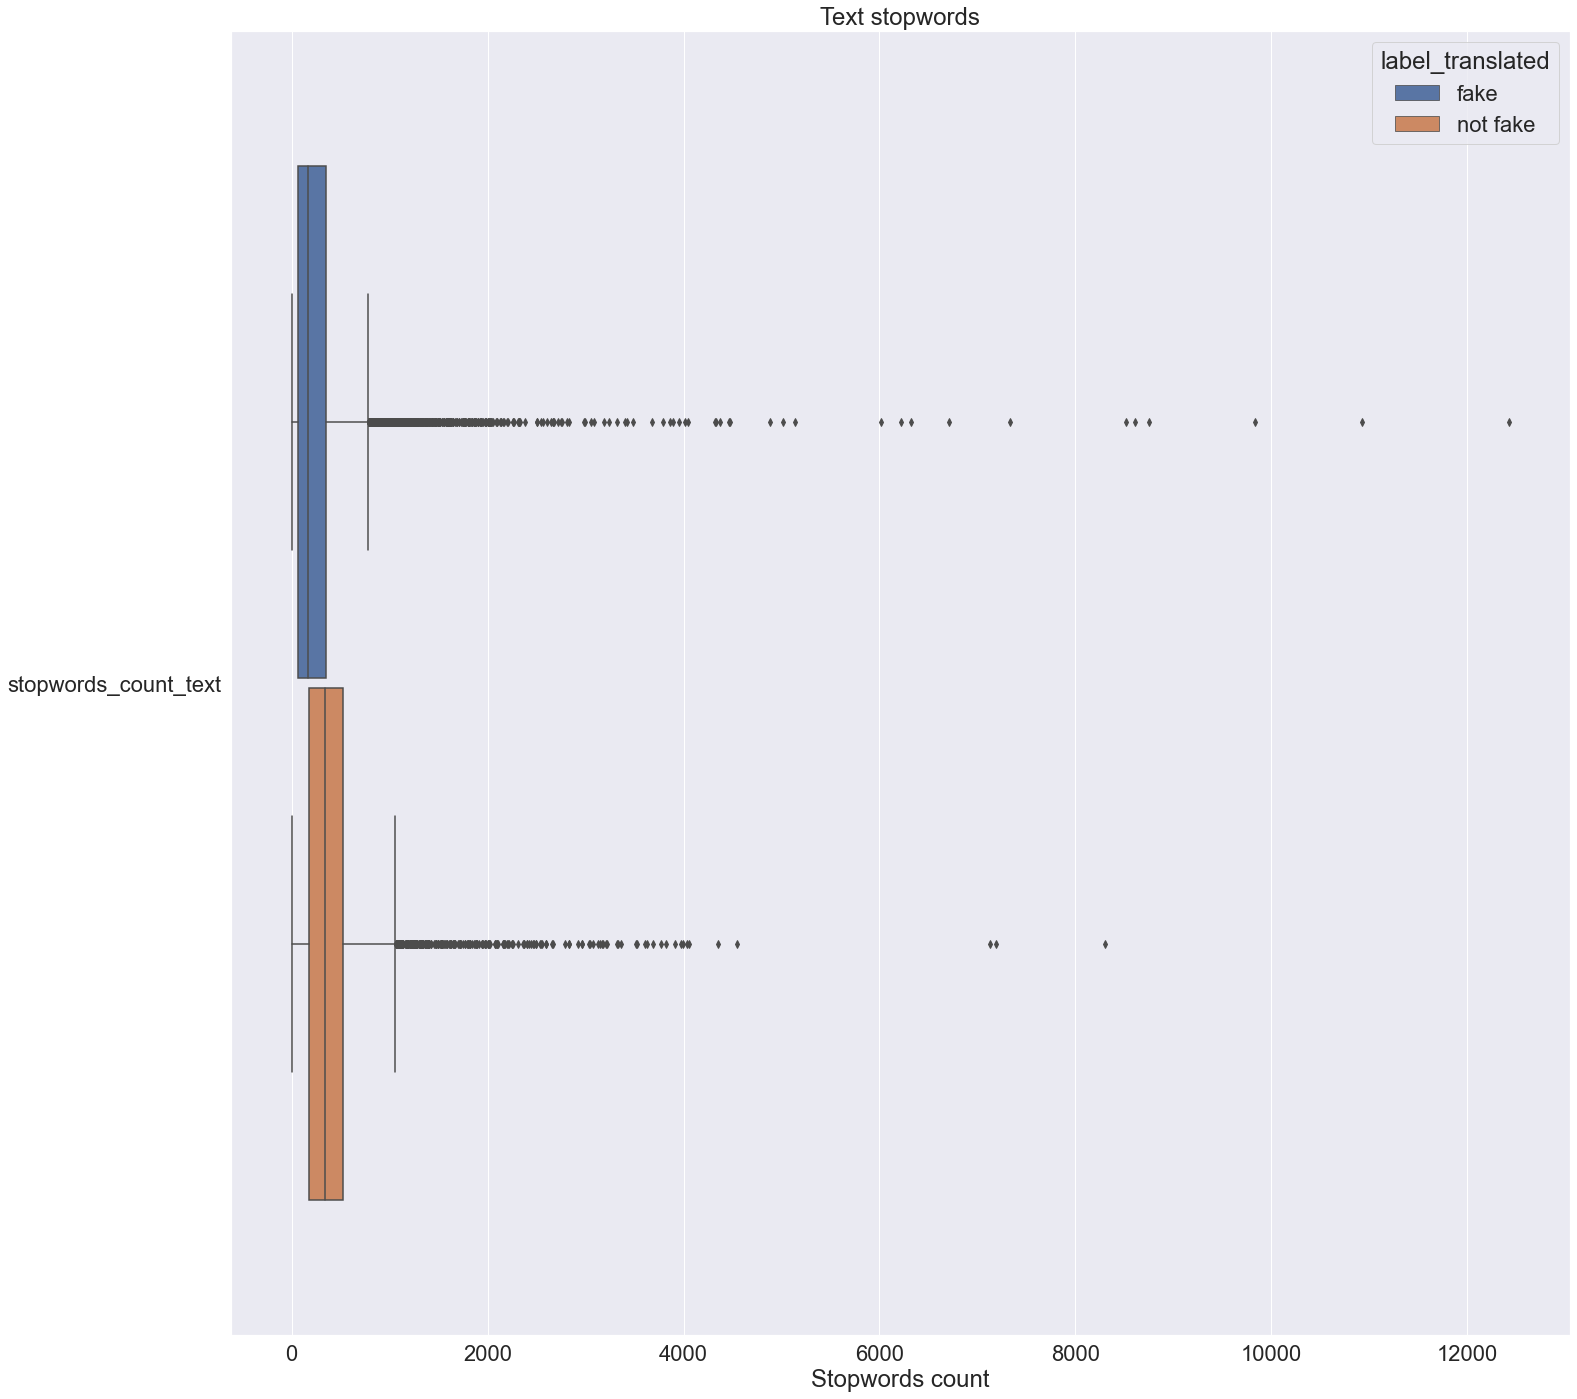

In [88]:
# Isolating required data
f = plt.figure(figsize=(24,24))
pos_df = pd.concat([news_data["stopwords_count_text"],  
                    news_data["label_translated"]], axis = 1)

# Un-pivot dataframe column as rows so in order to plot both at the same graph, same axis
pos_df = pd.melt(pos_df, id_vars=['label_translated'], var_name=['Stopword']) 

# Plot boxplot
sb.boxplot(x='value', y = "Stopword", hue = "label_translated", data = pos_df, orient = "h", showfliers = True).set(title="Text stopwords", 
                                                                                                                    xlabel='Stopwords count',
                                                                                                                    ylabel='')

## Parts of Speech (POS) Analysis

[Text(0.5, 1.0, 'Types of title POS across classes'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'POS type')]

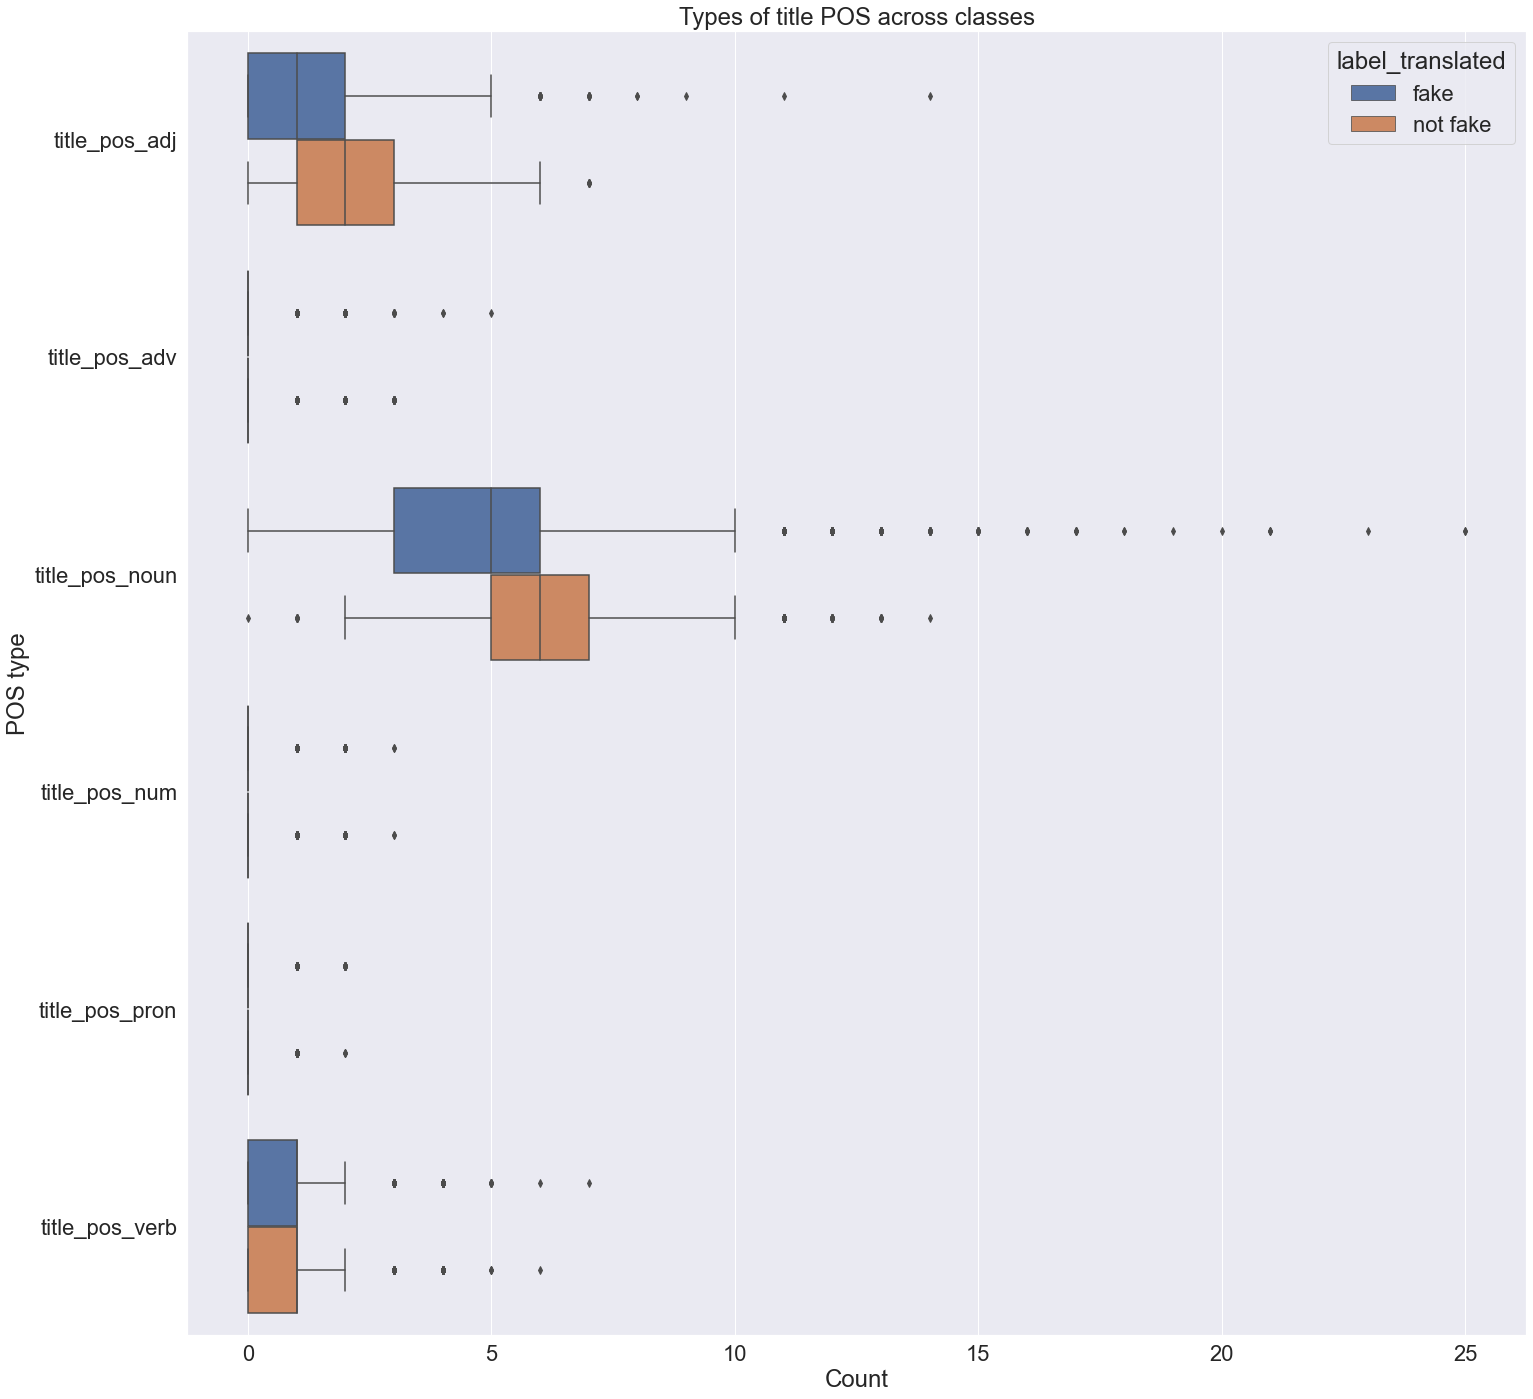

In [89]:
# Isolating required data
f = plt.figure(figsize=(24,24))
pos_df = pd.concat([news_data["title_pos_adj"], 
                    news_data["title_pos_adv"], 
                    news_data["title_pos_noun"], 
                    news_data["title_pos_num"], 
                    news_data["title_pos_pron"], 
                    news_data["title_pos_verb"],
                    news_data["label_translated"]], axis = 1)

# Un-pivot dataframe column as rows so in order to plot both at the same graph, same axis
pos_df = pd.melt(pos_df, id_vars=['label_translated'], var_name=['pos']) 

# Plot boxplot
sb.boxplot(x='value', y = "pos", hue = "label_translated", data = pos_df, orient = "h", showfliers = True).set(title="Types of title POS across classes", 
                                                                                                                    xlabel='Count',
                                                                                                                    ylabel='POS type')

[Text(0.5, 1.0, 'Types of text POS across classes'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'POS type')]

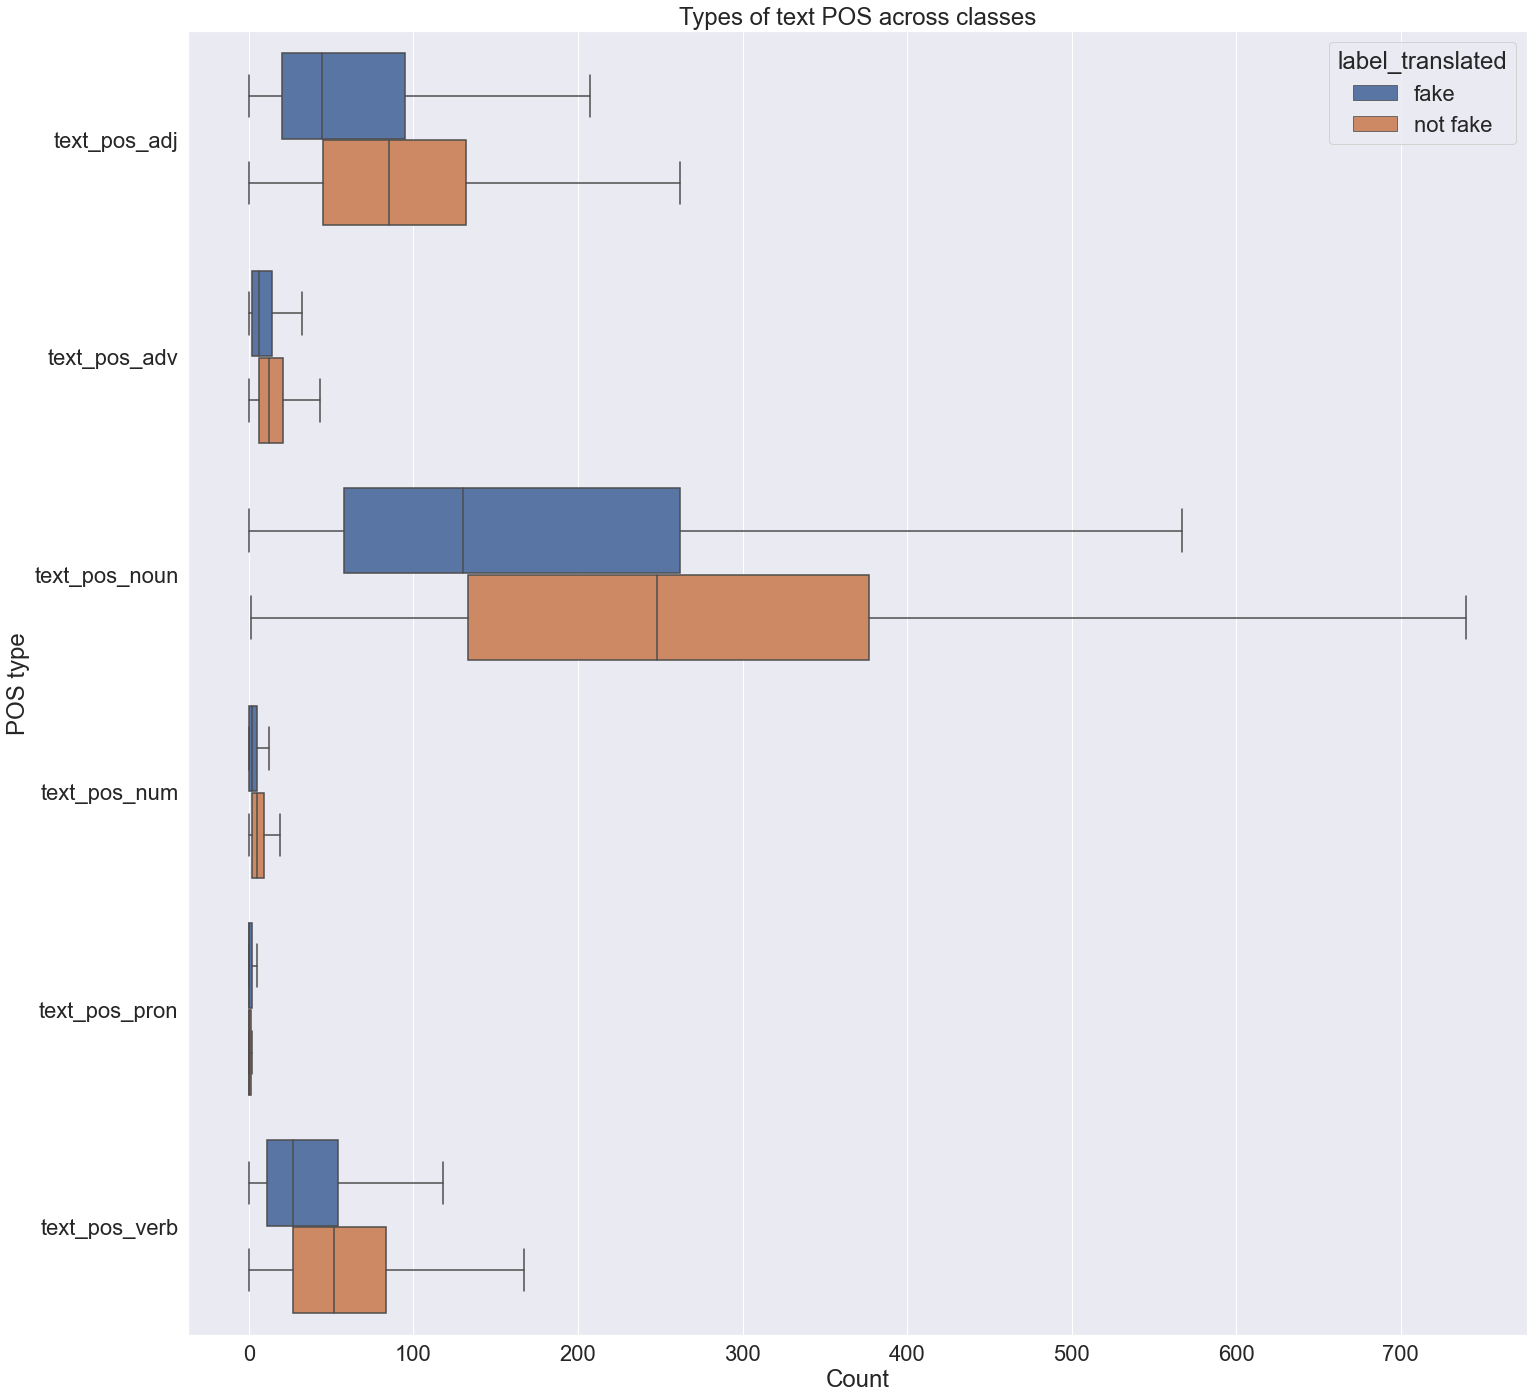

In [90]:
# Isolating required data
f = plt.figure(figsize=(24,24))
pos_df = pd.concat([news_data["text_pos_adj"], 
                    news_data["text_pos_adv"], 
                    news_data["text_pos_noun"], 
                    news_data["text_pos_num"], 
                    news_data["text_pos_pron"], 
                    news_data["text_pos_verb"],
                    news_data["label_translated"]], axis = 1)

# Un-pivot dataframe column as rows so in order to plot both at the same graph, same axis
pos_df = pd.melt(pos_df, id_vars=['label_translated'], var_name=['pos']) 

# Plot boxplot
sb.boxplot(x='value', y = "pos", hue = "label_translated", data = pos_df, orient = "h", showfliers = False).set(title="Types of text POS across classes", 
                                                                                                                    xlabel='Count',
                                                                                                                    ylabel='POS type')

## Correlation Analysis

### General Correlation (Numerical variables)

<Figure size 1440x576 with 0 Axes>

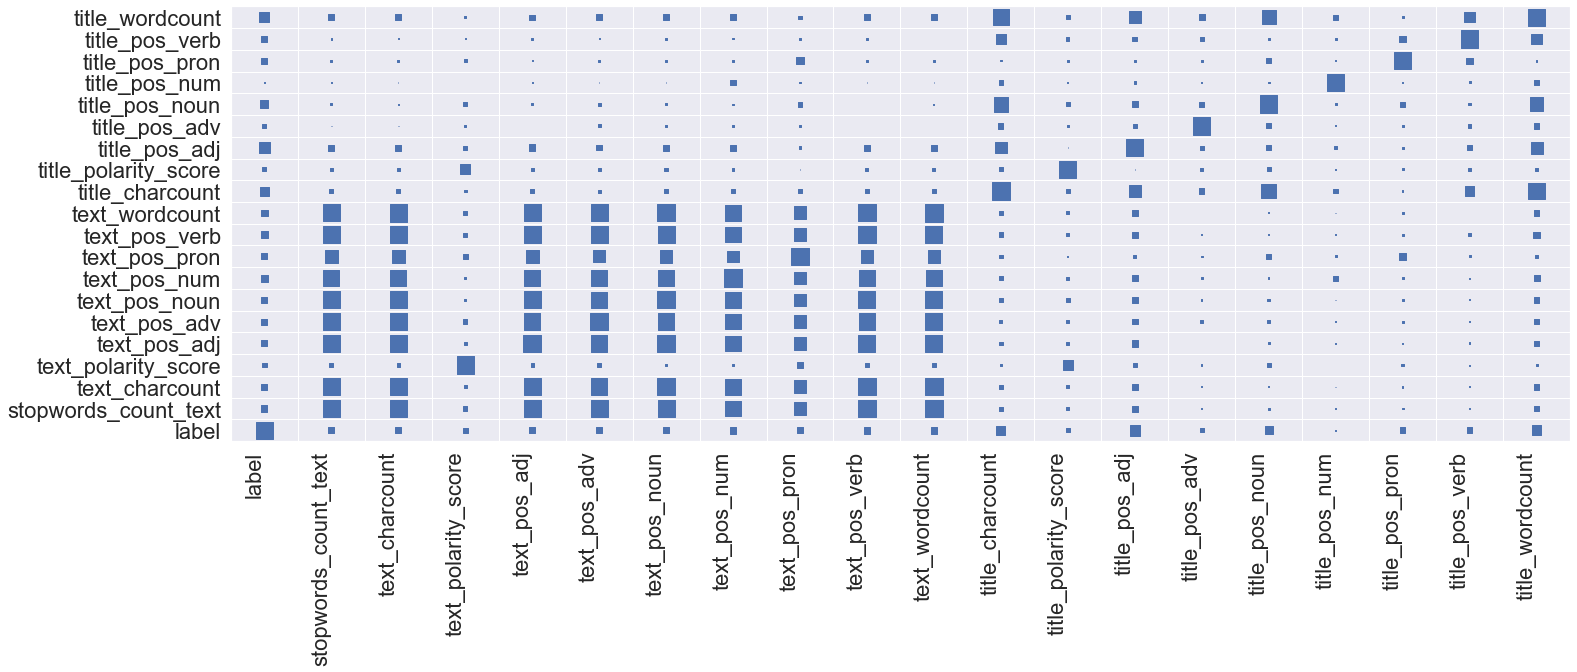

In [91]:
def heatmap(x, y, size):
    fig, ax = plt.subplots(figsize=(24, 8))
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 300
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size*size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=90, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    
    
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])

    
f = plt.figure(figsize=(20, 8))
columns = ['label', 'text_charcount',
           'title_charcount',
           'text_wordcount',
           'title_wordcount',
           'title_polarity_score',
          'text_polarity_score',
          'title_emotion',
          'text_emotion',
          'title_pos_adj',
          'title_pos_adv',
          'title_pos_noun',
          'title_pos_num',
          'title_pos_pron',
          'title_pos_verb',
          'text_pos_adj',
          'text_pos_adv',
          'text_pos_noun',
           'text_pos_num',
           'text_pos_pron',
           'text_pos_verb',
           'stopwords_count_text'
          ] 
corr = news_data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']

heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

[Text(0.5, 1.0, 'General correlation heatmap across all numeric variables')]

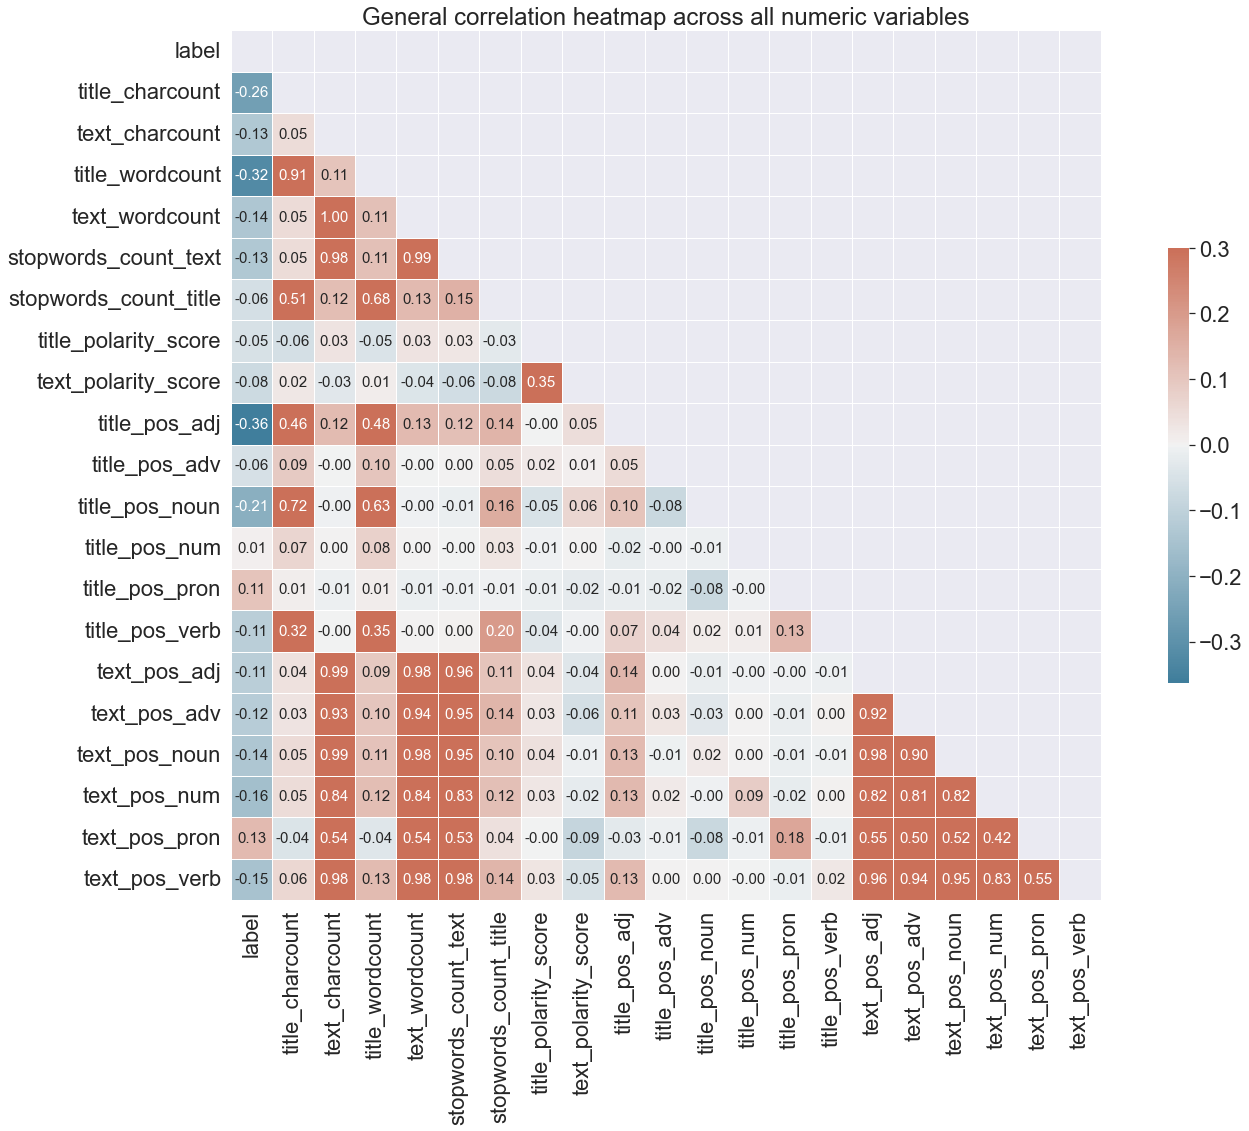

In [92]:
# Plot correlation heatmap for all numeric variables (Overview)

# Get correlation matrix
corr = news_data.corr()

# Define mask for a lower triangular matrix (Since the other half is the same, no point showing)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap
f, ax = plt.subplots(figsize=(24, 16))
# Define color map
cmap = sb.diverging_palette(230, 20, as_cmap=True)
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, annot_kws = {"size": 15}, fmt = ".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title="General correlation heatmap across all numeric variables")

[Text(0.5, 1.0, 'General correlation heatmap across all categorical variables')]

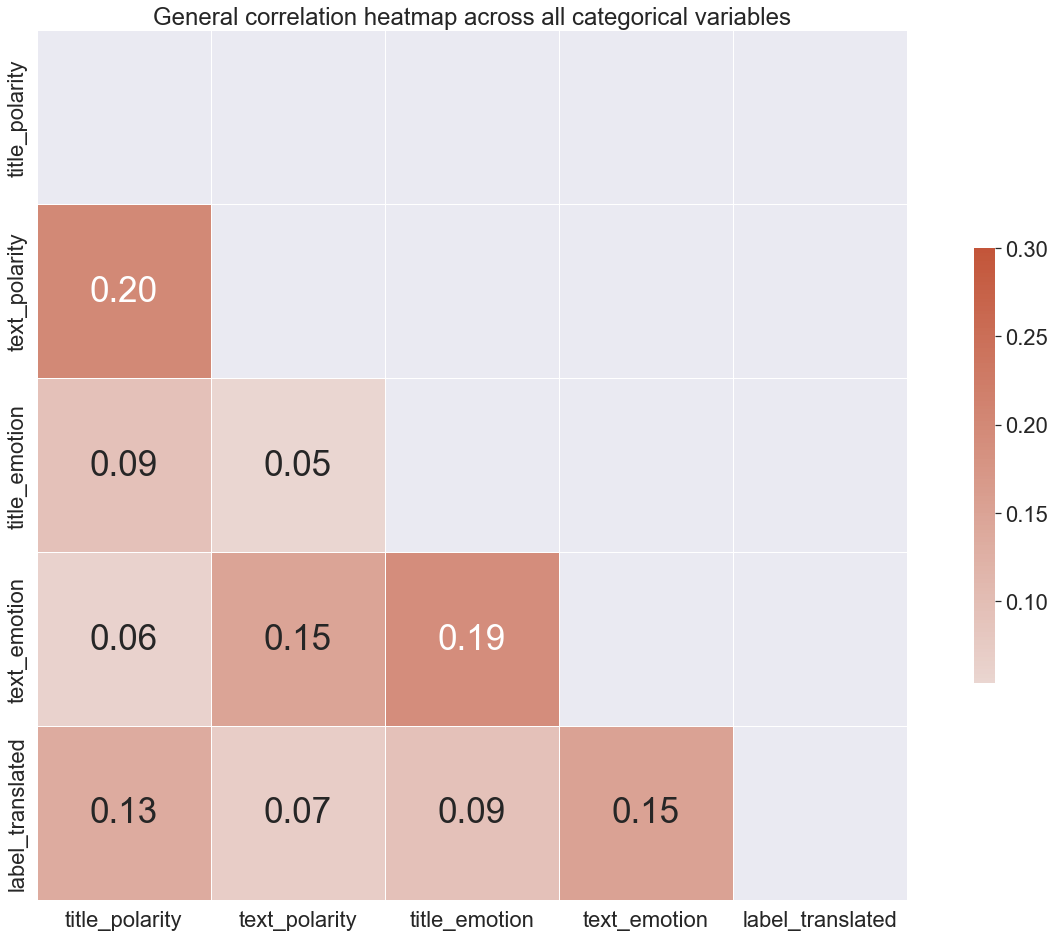

In [93]:
# Plot correlation heatmap for all categorical variables (Overview)

# Isolating the categorical variables
cat_df = pd.concat([news_data["title_polarity"], 
                       news_data["text_polarity"], 
                       news_data["title_emotion"], 
                       news_data["text_emotion"], 
                       news_data["label_translated"]], axis = 1)

# Calculate categorical correlation using cramer's V
categorical_correlation = associations(cat_df, compute_only=True)
# Convert back into df
categorical_correlation = pd.DataFrame(categorical_correlation['corr'])

# Define mask for a lower triangular matrix (Since the other half is the same, no point showing)
mask = np.triu(np.ones_like(categorical_correlation, dtype=bool))

# Plot heatmap
f, ax = plt.subplots(figsize=(24, 16))
# Define color map
cmap = sb.diverging_palette(230, 20, as_cmap=True)
sb.heatmap(categorical_correlation, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, annot_kws = {"size": 35}, fmt = ".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title="General correlation heatmap across all categorical variables")

### POS correlations

[Text(0.5, 1.0, 'POS to label correlation heatmap')]

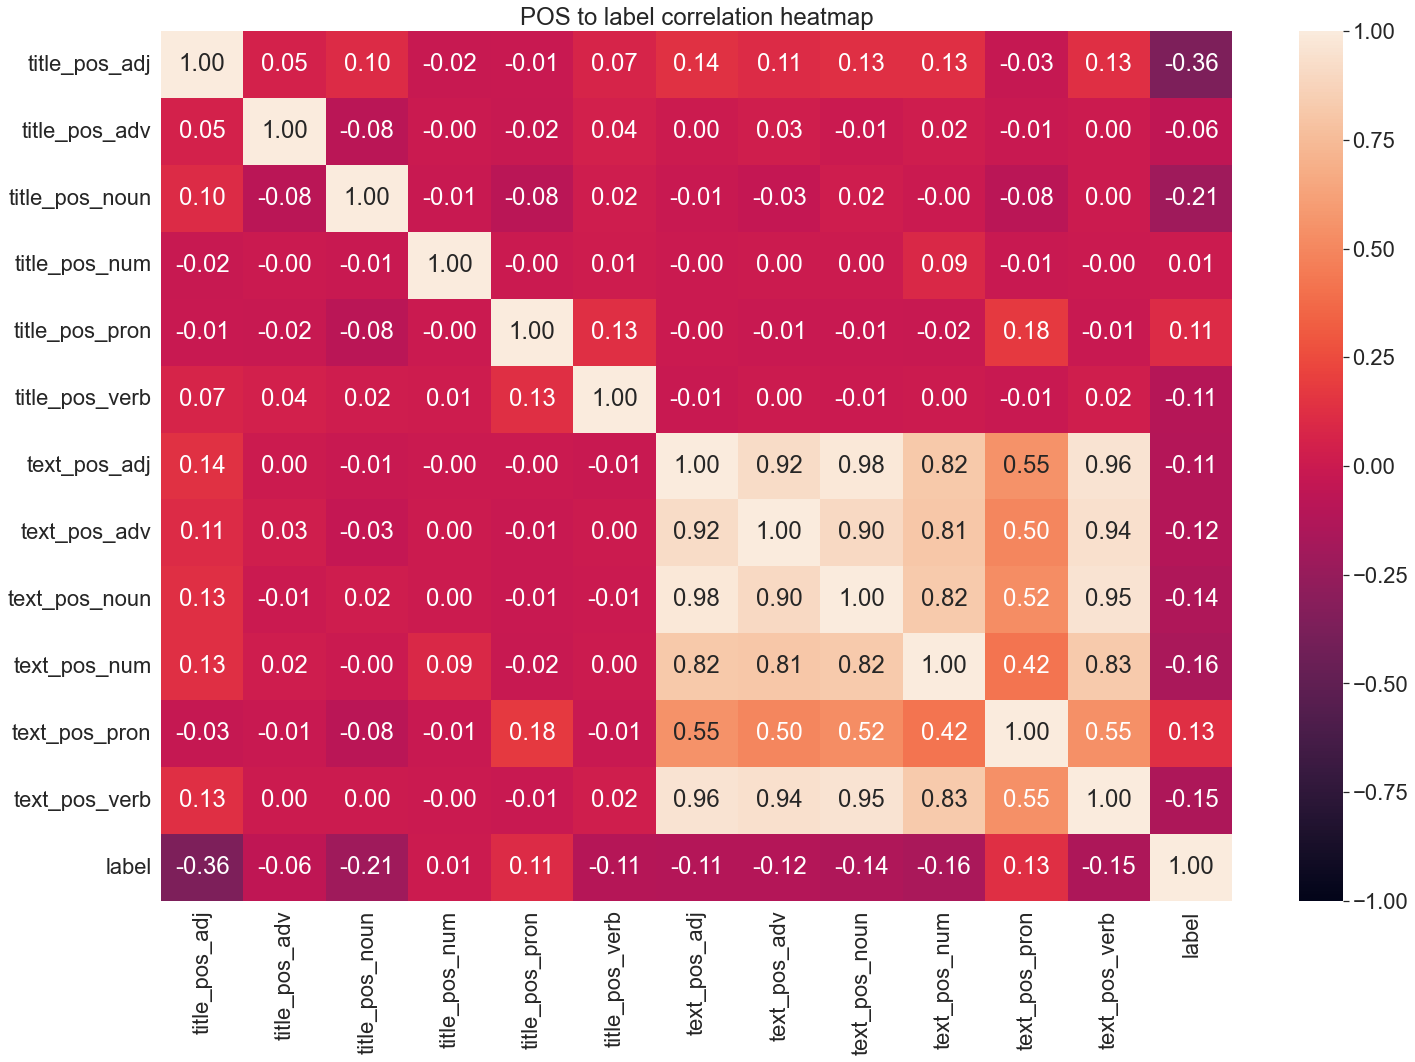

In [94]:
# Isolating required variables
title_pos_corr_df = pd.concat([news_data["title_pos_adj"], 
                               news_data["title_pos_adv"], 
                               news_data["title_pos_noun"], 
                               news_data["title_pos_num"], 
                               news_data["title_pos_pron"],
                               news_data["title_pos_verb"],
                               news_data["text_pos_adj"], 
                               news_data["text_pos_adv"], 
                               news_data["text_pos_noun"], 
                               news_data["text_pos_num"], 
                               news_data["text_pos_pron"], 
                               news_data["text_pos_verb"], 
                               news_data["label"]], axis = 1)

# Plot correlation heatmap
f = plt.figure(figsize=(24, 16))
sb.heatmap(title_pos_corr_df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f").set(title="POS to label correlation heatmap")

### Wordcount & charcount correlations

[Text(0.5, 1.0, 'Wordcount & Charcount to label correlation heatmap')]

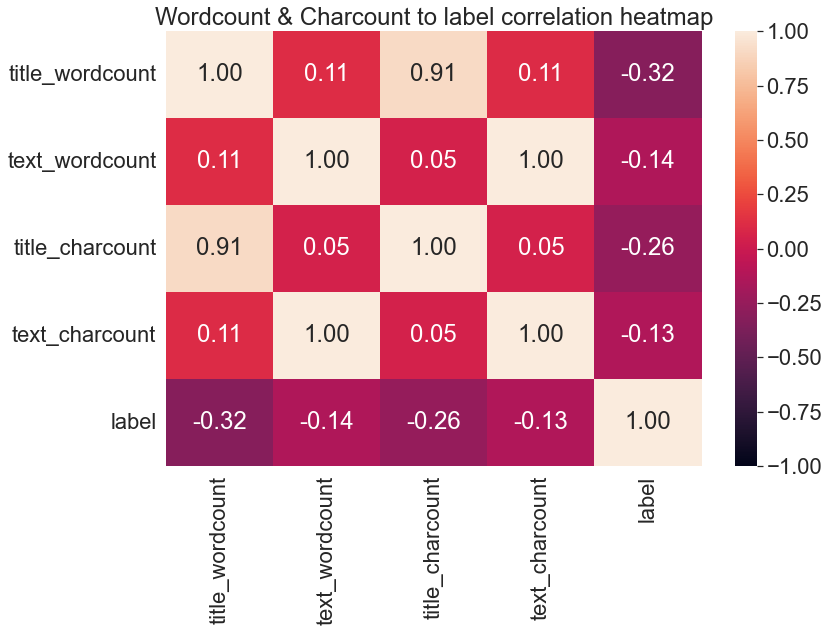

In [95]:
# Isolating required variables
pos_corr_df = pd.concat([news_data["title_wordcount"], 
                         news_data["text_wordcount"],
                         news_data["title_charcount"],
                         news_data["text_charcount"],
                         news_data["label"]], axis = 1)

# Plot correlation heatmap
f = plt.figure(figsize=(12, 8))
sb.heatmap(pos_corr_df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f").set(title="Wordcount & Charcount to label correlation heatmap")

### Stopwords correlations

[Text(0.5, 1.0, 'Stopwords to label correlation heatmap')]

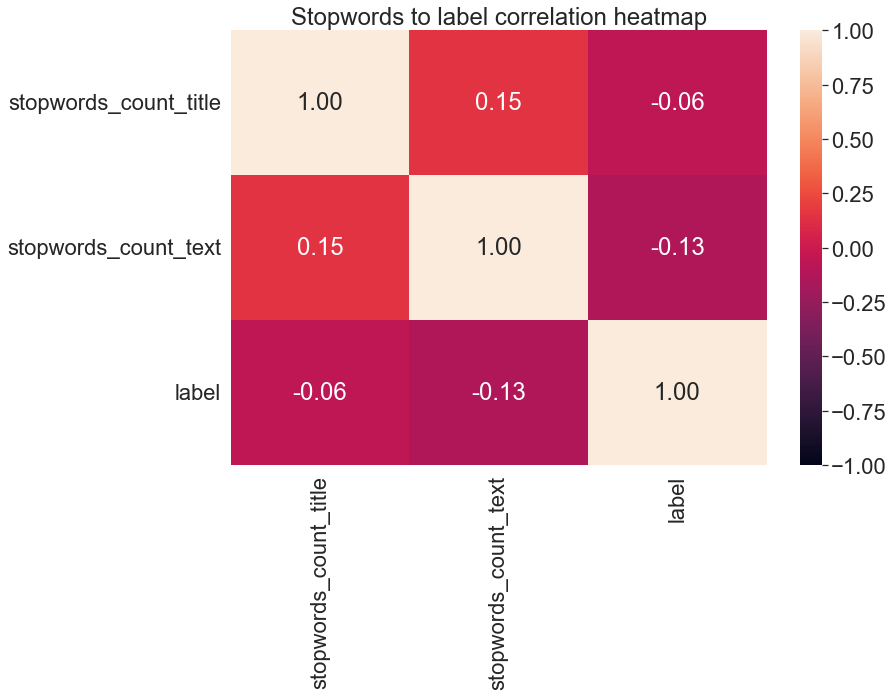

In [96]:
# Isolating required variables
pos_corr_df = pd.concat([news_data["stopwords_count_title"], 
                         news_data["stopwords_count_text"],
                         news_data["label"]], axis = 1)

# PLot correlation heatmap
f = plt.figure(figsize=(12, 8))
sb.heatmap(pos_corr_df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f").set(title="Stopwords to label correlation heatmap")

### Polarity & emotions correlations

C:\Users\Aozy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


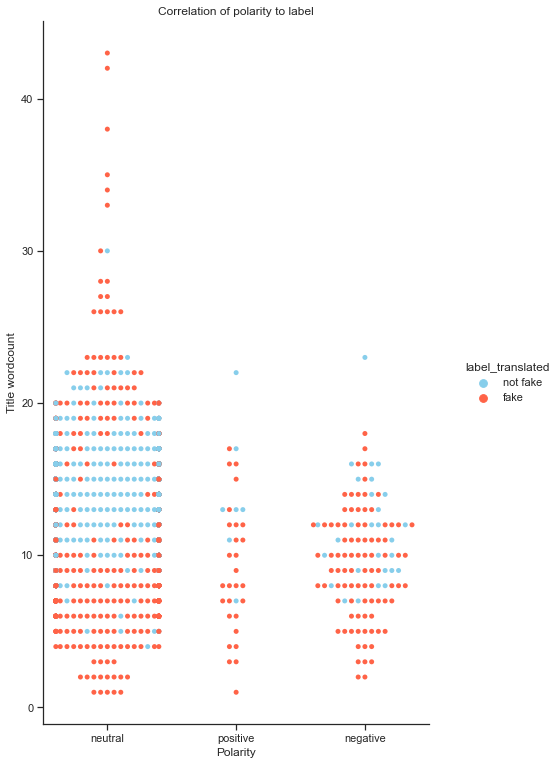

In [97]:
# Sampling 10% of the data to reduce loading time
news_subset = news_data.sample(
                    n=None, 
                    frac=0.1, 
                    replace=False, 
                    weights=None, 
                    random_state=1, 
                    axis=None, 
                    ignore_index=False)

# Plot a dot chart
sb.set_theme(style="ticks")

# Define conistent ordering
order = ["neutral", "positive", 'negative']
# Plot
g = sb.catplot(x="title_polarity", y='title_wordcount', hue="label_translated", 
           data=news_subset, order=order, kind='swarm', 
               hue_order=['not fake', 'fake'], palette={"fake": "tomato",
                                                        "not fake": "skyblue"}, seed=1).set(title="Correlation of polarity to label", 
                                                                                            xlabel='Polarity',
                                                                                            ylabel='Title wordcount')

# Increase size
g.fig.set_figwidth(8.27)
g.fig.set_figheight(11.7)

C:\Users\Aozy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


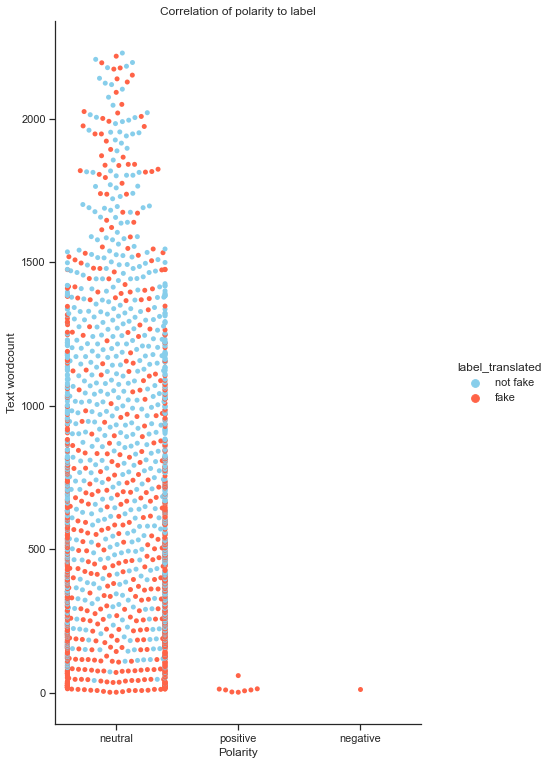

In [98]:
# Set outlier range
iqr_text_wordcount = news_data["text_wordcount"].quantile(0.75) - news_data["text_wordcount"].quantile(0.25)
outlier_range_low = news_data["text_wordcount"].quantile(0.25) - (iqr_text_wordcount*1.5)
outlier_range_high = news_data["text_wordcount"].quantile(0.75) + (iqr_text_wordcount*1.5)

# Filter outliers
outlier_free_df = news_data.loc[(news_data["text_wordcount"] > outlier_range_low) & (news_data["text_wordcount"] < outlier_range_high)]

# Sampling to 10% of data to reduce laoding time
news_subset = outlier_free_df.sample(
                    n=None, 
                    frac=0.1, 
                    replace=False, 
                    weights=None, 
                    random_state=1, 
                    axis=None, 
                    ignore_index=False)

# Plot dot chart
sb.set_theme(style="ticks")
order = ["neutral", "positive", 'negative']
g = sb.catplot(x="text_polarity", y='text_wordcount', hue="label_translated", 
           data=news_subset, order=order, kind='swarm', 
               hue_order=['not fake', 'fake'], palette={"fake": "tomato",
                                                        "not fake": "skyblue"}, seed=1).set(title="Correlation of polarity to label", 
                                                                                            xlabel='Polarity',
                                                                                            ylabel='Text wordcount')

# Increase size
g.fig.set_figwidth(8.27)
g.fig.set_figheight(11.7)

C:\Users\Aozy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Aozy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Aozy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Aozy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Aozy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.8% of the points cann

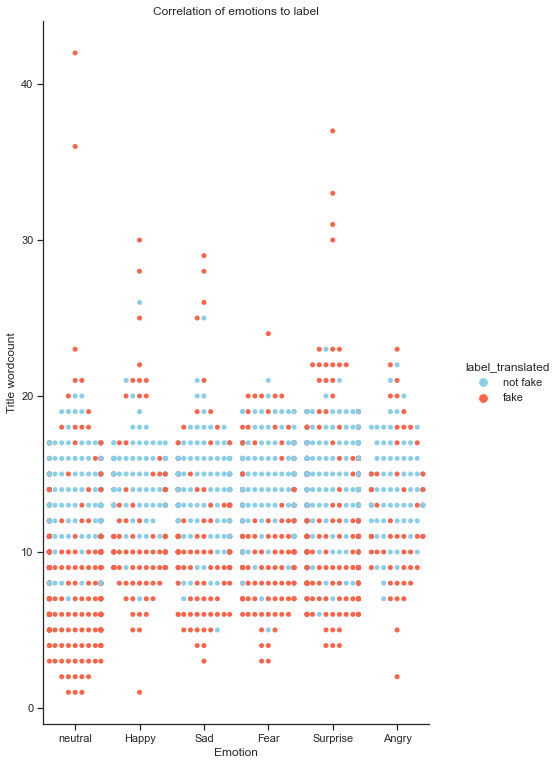

In [99]:
# Plot dot chart
sb.set_theme(style="ticks")
# Define consistent ordering
order = ['neutral', 'Happy', 'Sad', 'Fear', 'Surprise', 'Angry']
g = sb.catplot(x="title_emotion", y='title_wordcount', hue="label_translated", 
           data=news_subset, order=order, kind='swarm', 
               hue_order=['not fake', 'fake'], palette={"fake": "tomato",
                                                        "not fake": "skyblue"}, seed=1).set(title="Correlation of emotions to label", 
                                                                                            xlabel='Emotion',
                                                                                            ylabel='Title wordcount')

# Increase size
g.fig.set_figwidth(8.27)
g.fig.set_figheight(11.7)

C:\Users\Aozy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Aozy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Aozy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Aozy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Aozy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.2% of the points cann

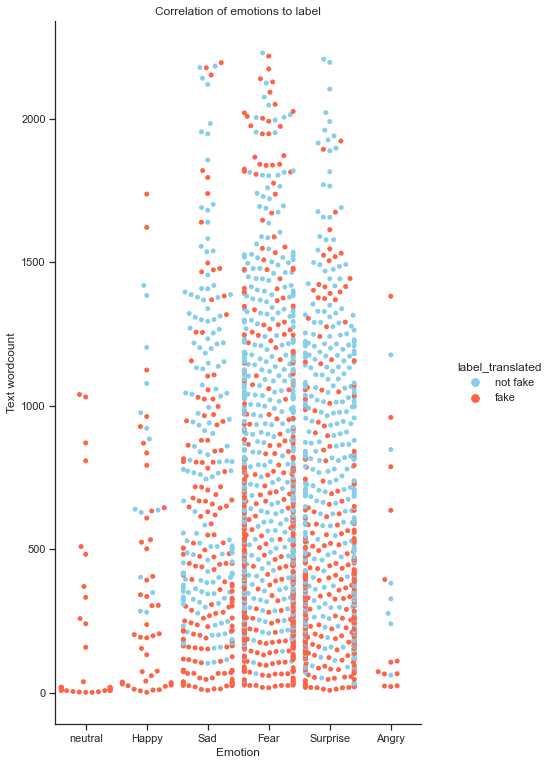

In [100]:
# Set outlier range
iqr_text_wordcount = news_data["text_wordcount"].quantile(0.75) - news_data["text_wordcount"].quantile(0.25)
outlier_range_low = news_data["text_wordcount"].quantile(0.25) - (iqr_text_wordcount*1.5)
outlier_range_high = news_data["text_wordcount"].quantile(0.75) + (iqr_text_wordcount*1.5)

# Filter outliers
outlier_free_df = news_data.loc[(news_data["text_wordcount"] > outlier_range_low) & (news_data["text_wordcount"] < outlier_range_high)]

# Sampling to 10% of data to reduce loading time
news_subset = outlier_free_df.sample(
                    n=None, 
                    frac=0.1, 
                    replace=False, 
                    weights=None, 
                    random_state=1, 
                    axis=None, 
                    ignore_index=False)

# Plot dot chart
sb.set_theme(style="ticks")
order = ['neutral', 'Happy', 'Sad', 'Fear', 'Surprise', 'Angry']
g = sb.catplot(x="text_emotion", y='text_wordcount', hue="label_translated", 
           data=news_subset, order=order, kind='swarm', 
               hue_order=['not fake', 'fake'], palette={"fake": "tomato",
                                                        "not fake": "skyblue"}, seed=1).set(title="Correlation of emotions to label", 
                                                                                            xlabel='Emotion',
                                                                                            ylabel='Text wordcount')

# Increase size
g.fig.set_figwidth(8.27)
g.fig.set_figheight(11.7)